In [62]:
%matplotlib inline 
import matplotlib.pylab as plt 
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler





column_names_satelite_data = { 'ADM0_EN': 'Country',
                    'ADM1_EN': 'District',
                    'Year':'year',
                    'Month':'month',
                    'Day':'day',
                    'Date':'date',
                    'NDVI_mean':'NDVI',
                    'EVI_mean': 'EVI',
                    'precipitation_sum':'precipitation_per_hour_v1',
                    'hourlyPrecipRate_sum':'precipitation_per_hour_v2',
                   'LST_Day_1km_mean':'surface_temperature_daytime',
                   'LST_Night_1km_mean':'surface_temperature_nighttime',
                    'Evap_tavg_mean': 'evapotranspiration',
                    'Rainf_f_tavg_mean':'rainfall',
                    'SoilMoi00_10cm_tavg_mean':'SoilMoisture00_10cm',
                    'SoilMoi10_40cm_tavg_mean':'SoilMoisture10_40cm',
                    'SoilMoi40_100cm_tavg_mean':'SoilMoisture40_100cm',
                    'SoilMoi100_200cm_tavg_mean':'SoilMoisture100_200cm',
                    'SoilTemp00_10cm_tavg_mean':'SoilTemperature00_10cm',
                    'SoilTemp10_40cm_tavg_mean':'SoilTemperature10_40cm',
                    'SoilTemp40_100cm_tavg_mean':'SoilTemperature40_100cm',
                    'SoilTemp100_200cm_tavg_mean':'SoilTemperature100_200cm',
                    'Tair_f_tavg_mean': 'air_temperature',
                    'Wind_f_tavg_mean': 'wind_speed',
                   }



In [63]:
DroughtData =  pd.read_csv('Droughts_satelite_and_events.csv', low_memory=False)
UG = DroughtData[DroughtData['Country']=="Uganda"]
KE = DroughtData[DroughtData['Country']=="Kenya"]


## NDVI and EVI 'anomaly'
check: https://earthobservatory.nasa.gov/features/MeasuringVegetation/measuring_vegetation_4.php

The difference in NDVI to the average NDVI of for a particular region in a given month should be a decent indicator of a drought. At least, the most long/severe droughts. 


In [64]:
DroughtData =  pd.read_csv('Droughts_satelite_and_events.csv', low_memory=False)
UG = DroughtData[DroughtData['Country']=="Uganda"]
KE = DroughtData[DroughtData['Country']=="Kenya"]


subset = UG[['District','month', 'EVI','NDVI']].dropna()
avg_month_district = subset.groupby(['District','month'])[['NDVI','EVI']].mean().reset_index()
avg_month_district.rename(columns={'NDVI':'NDVI_time_avg','EVI':'EVI_time_avg'}, inplace=True)


UG = UG.merge(avg_month_district,
                        on=['month','District'],
                         how='outer')

UG['NDVI_anomaly'] = UG['NDVI'] - UG['NDVI_time_avg']
UG['EVI_anomaly'] = UG['EVI'] - UG['EVI_time_avg']

## normalizing by district: EVI vs NDVI 
Is there any difference?
With the exception of one or two districts, there seems not much difference , as it should.

General info NDVI / EVI:
https://earthobservatory.nasa.gov/features/MeasuringVegetation/measuring_vegetation_4.php


* Unhealthy crops/plants should have lower NDVI/EVI values
* mentions difference between NDVI and 'the usual NDVI of region' (take a long, 15-20 year average) should be indicative of (long) droughts.
* EVI calculated similarly to NDVI, but corrects for light reflection/absorbtion by air particles and does not saturate as quickly at regions with high chlorophore content ('rain forest'). 



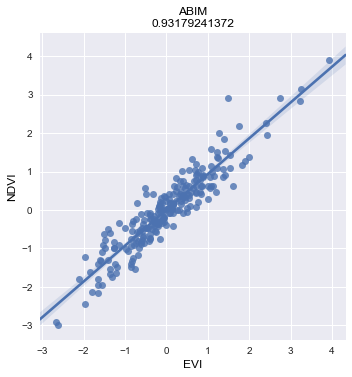

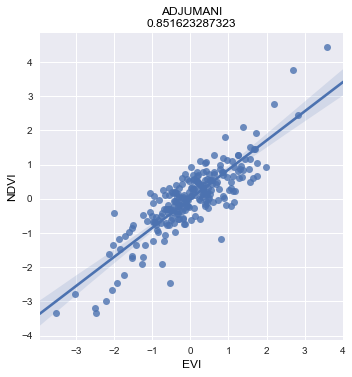

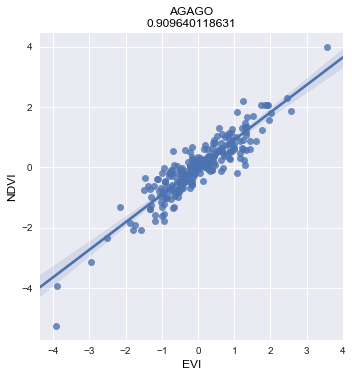

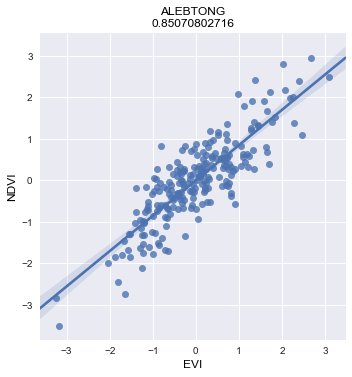

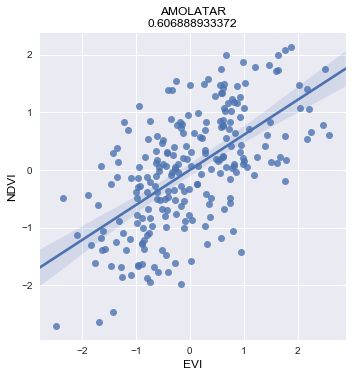

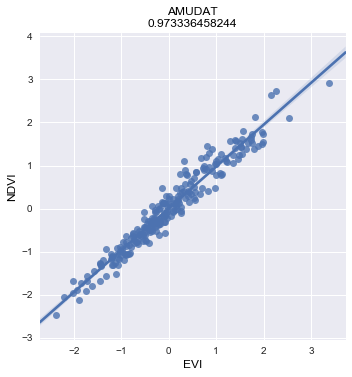

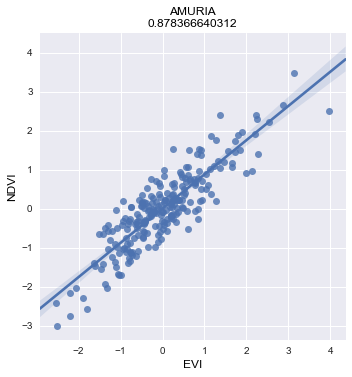

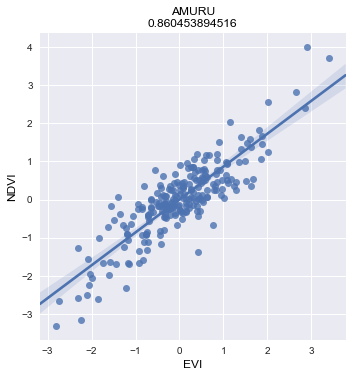

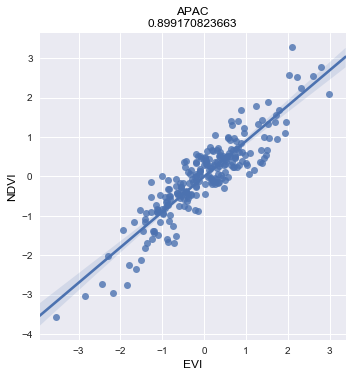

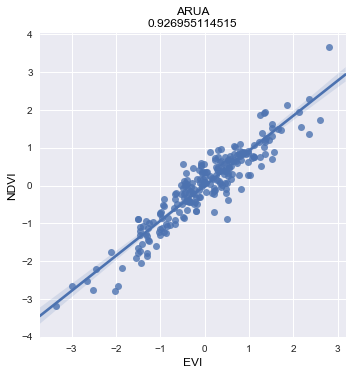

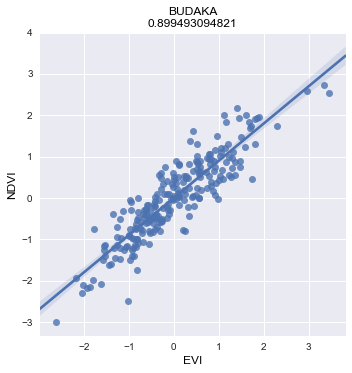

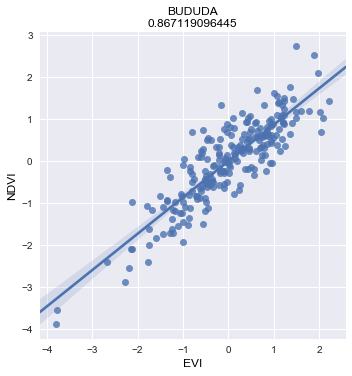

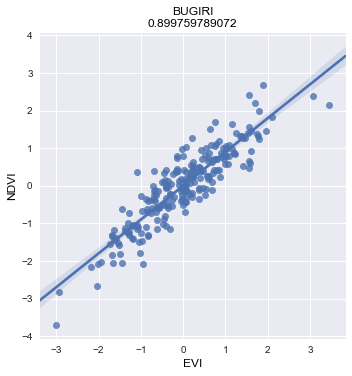

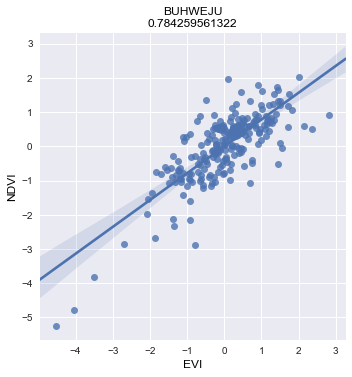

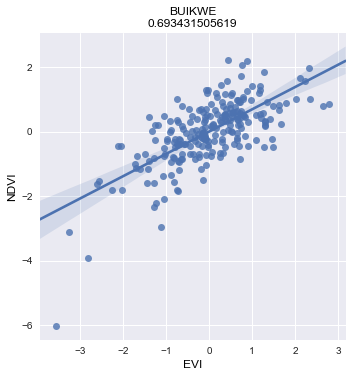

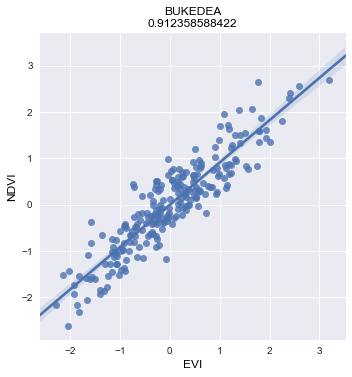

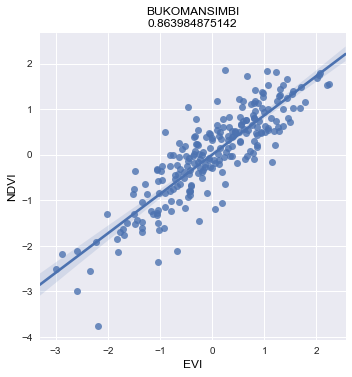

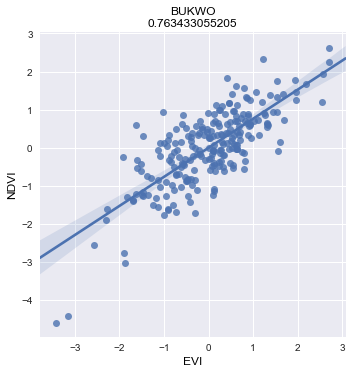

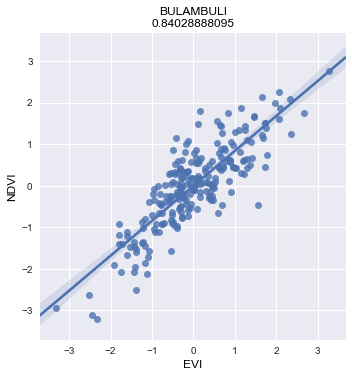

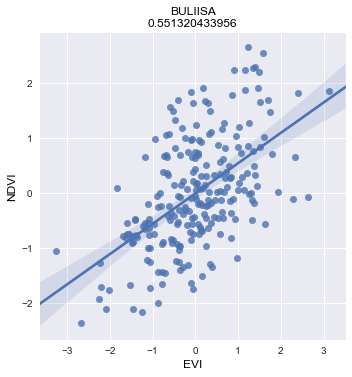

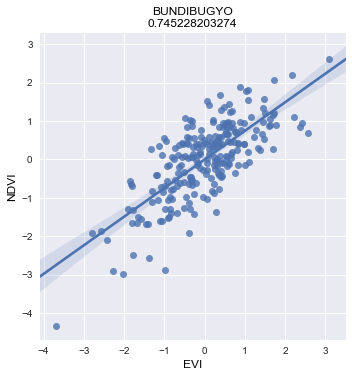

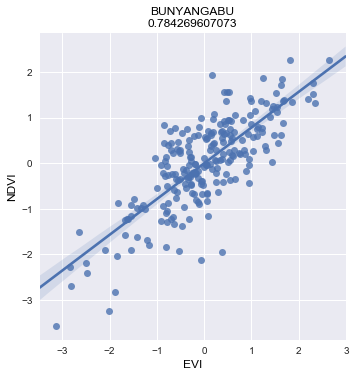

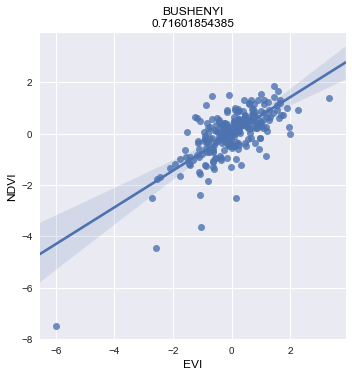

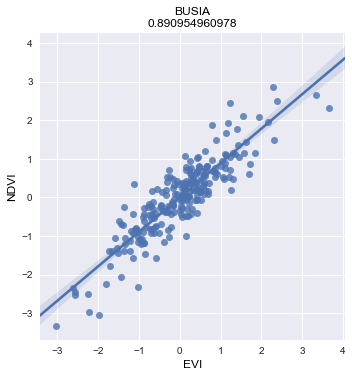

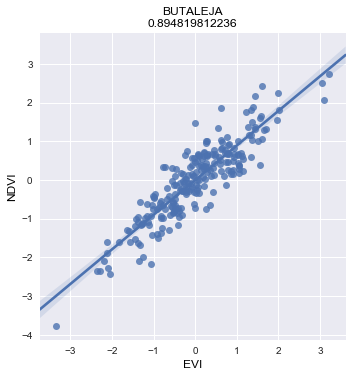

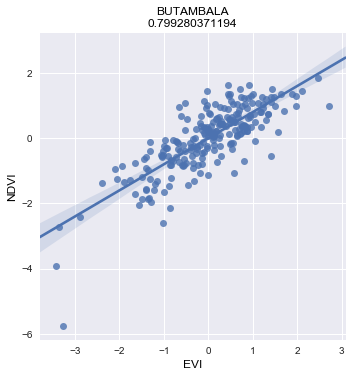

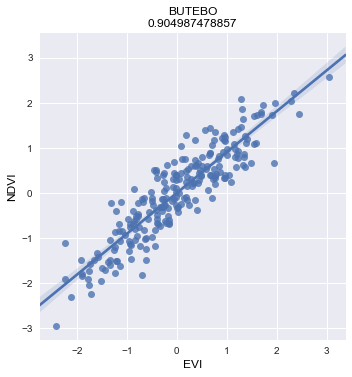

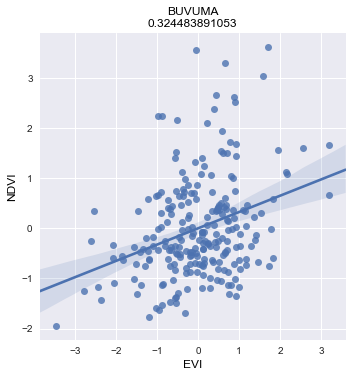

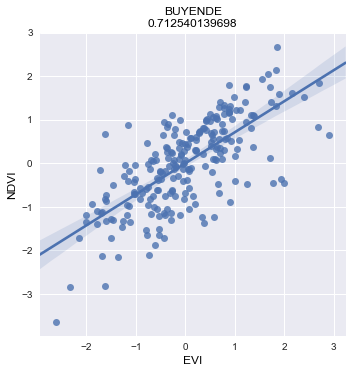

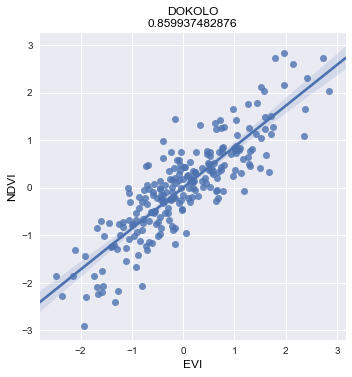

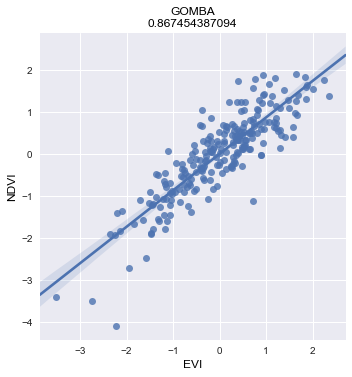

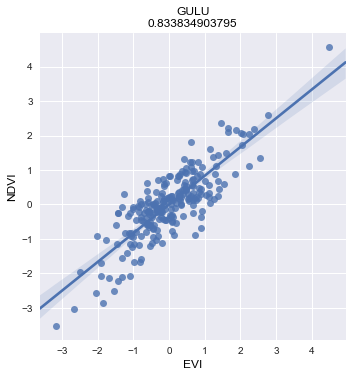

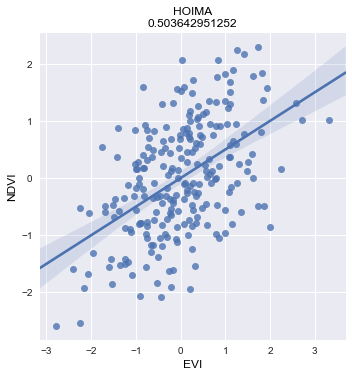

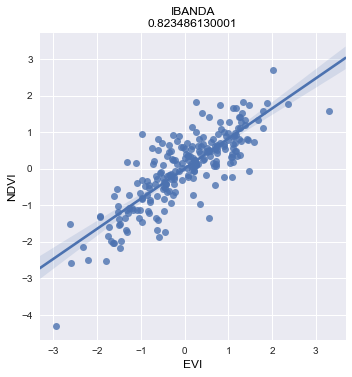

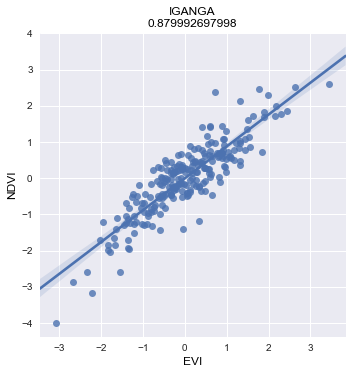

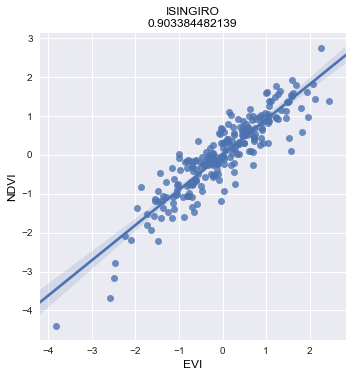

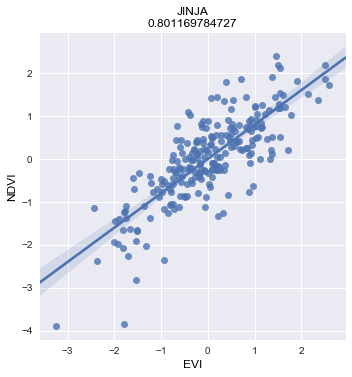

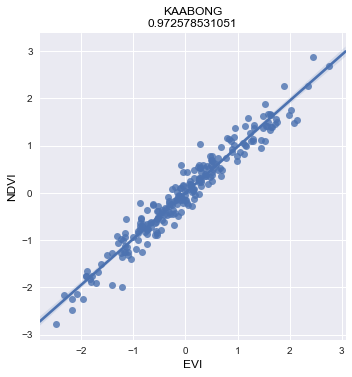

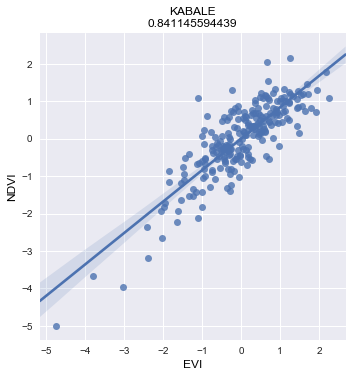

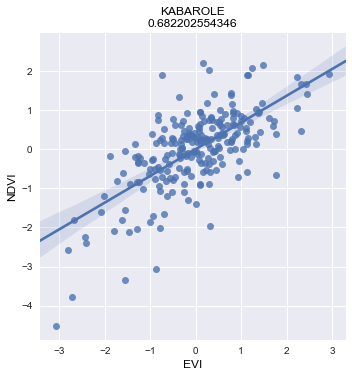

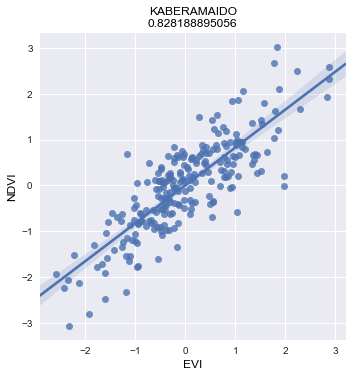

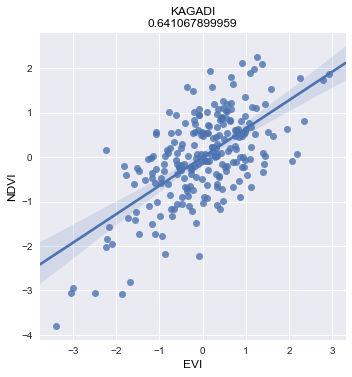

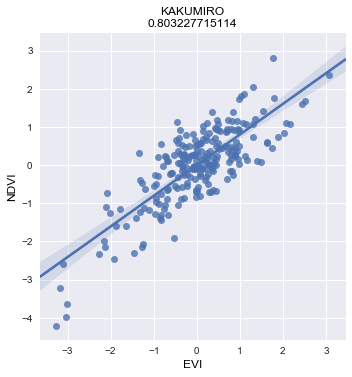

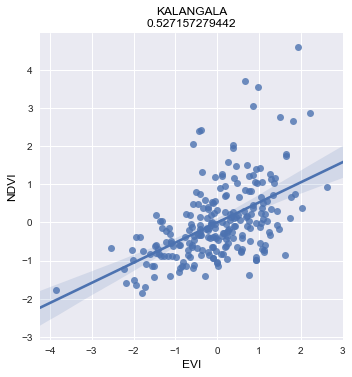

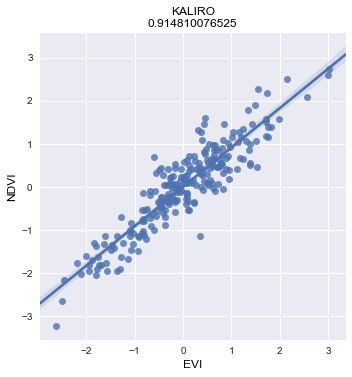

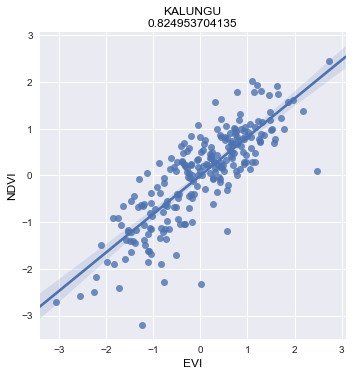

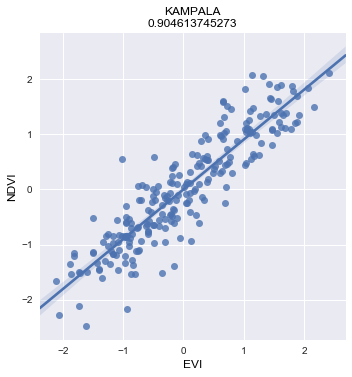

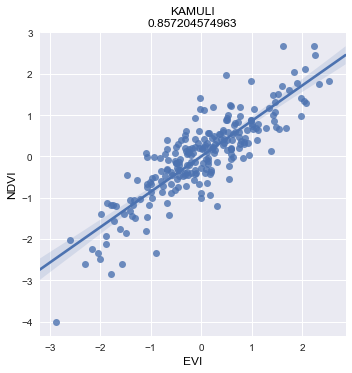

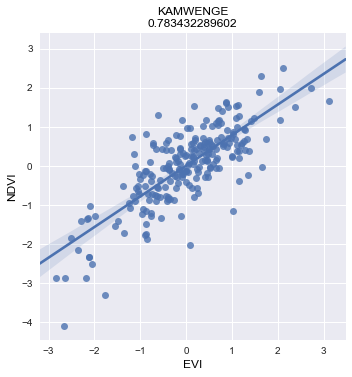

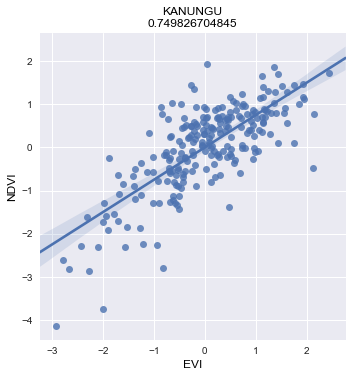

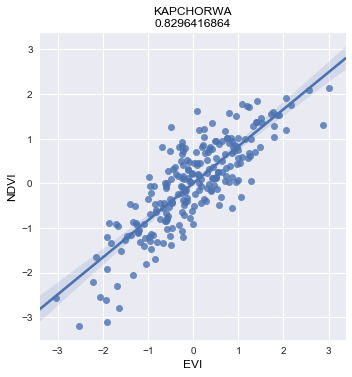

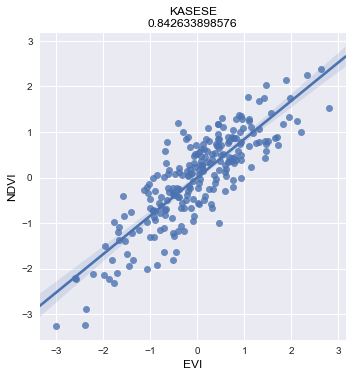

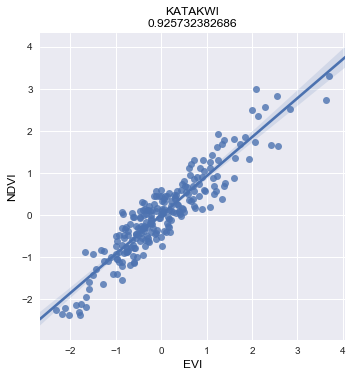

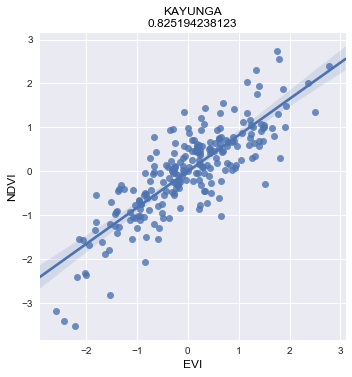

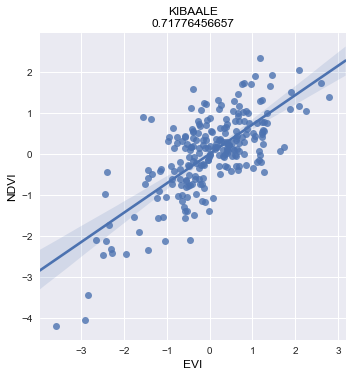

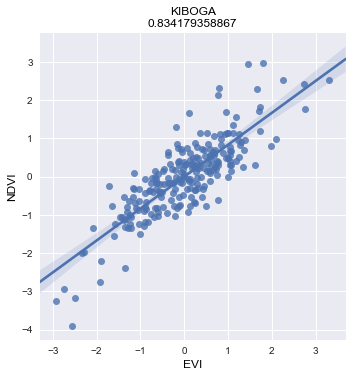

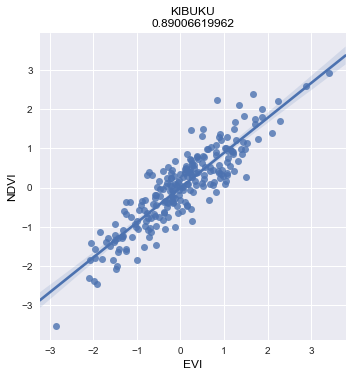

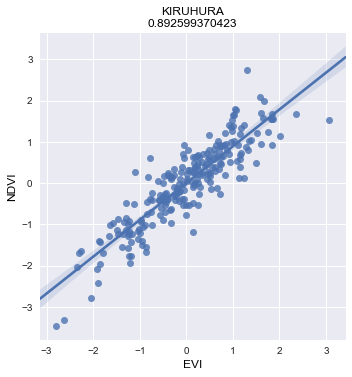

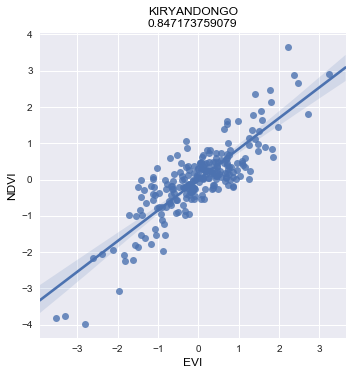

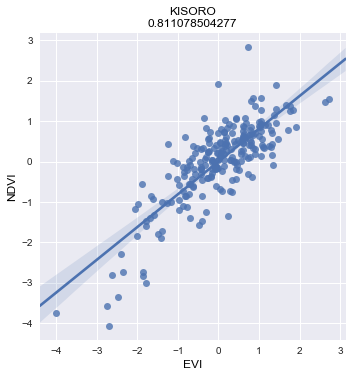

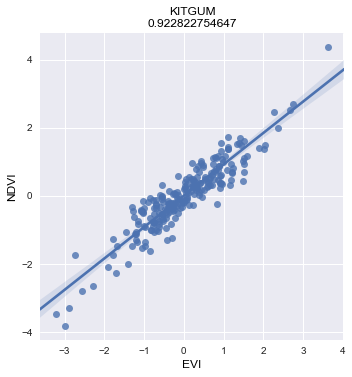

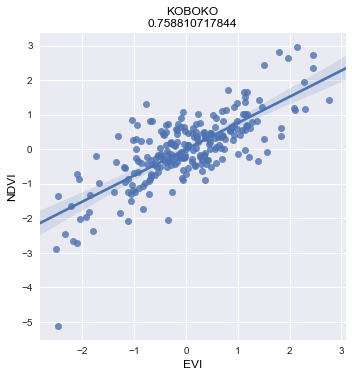

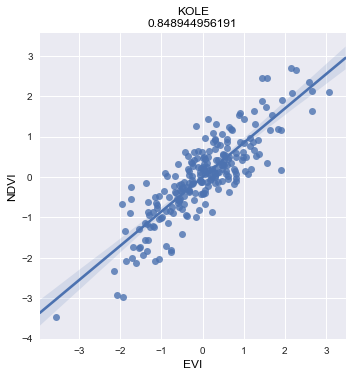

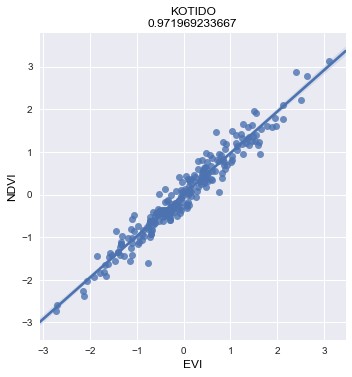

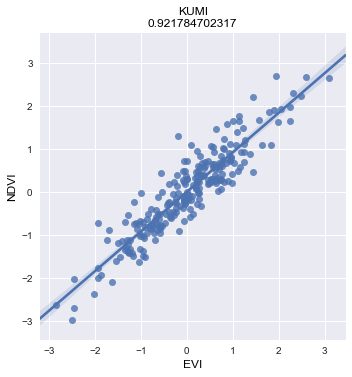

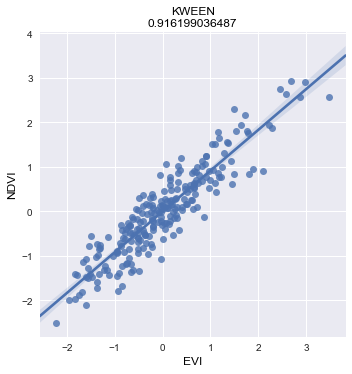

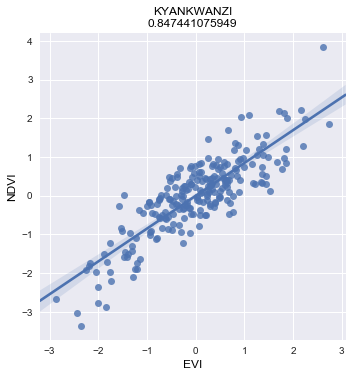

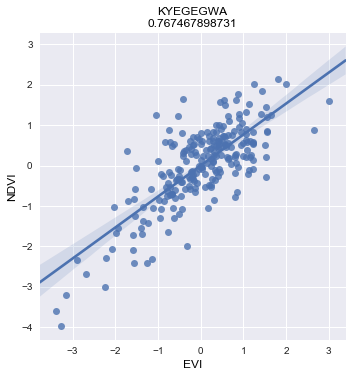

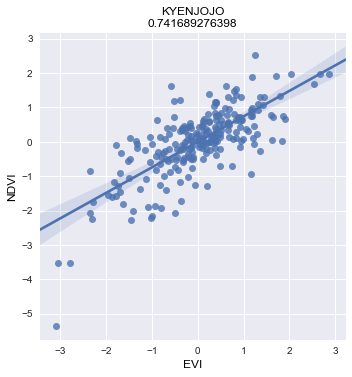

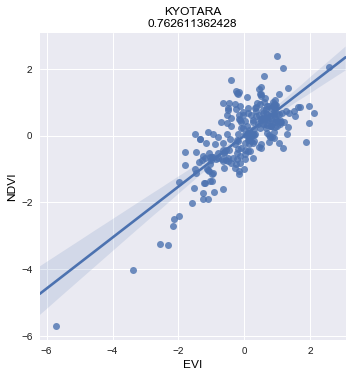

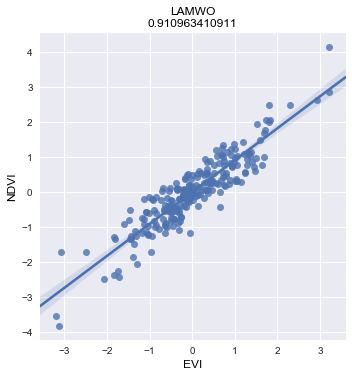

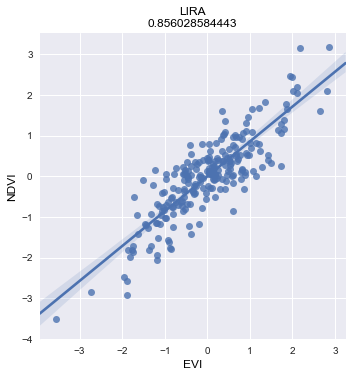

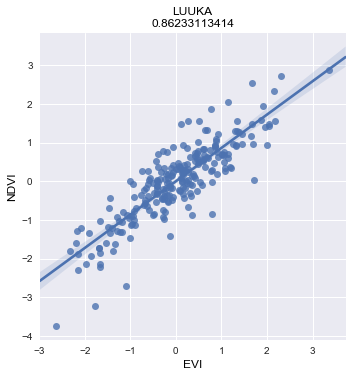

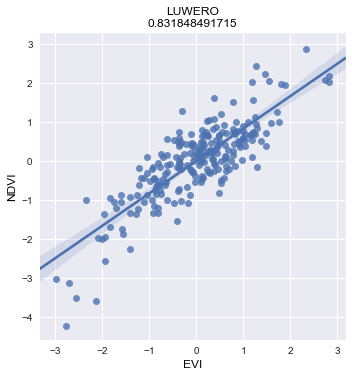

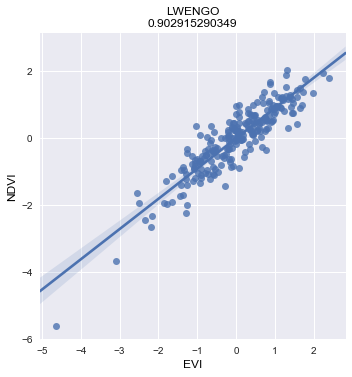

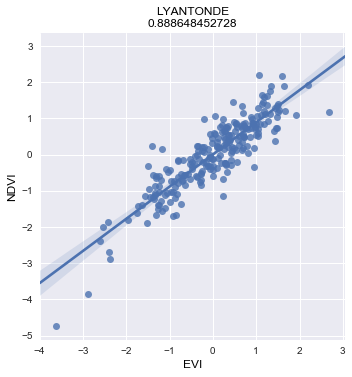

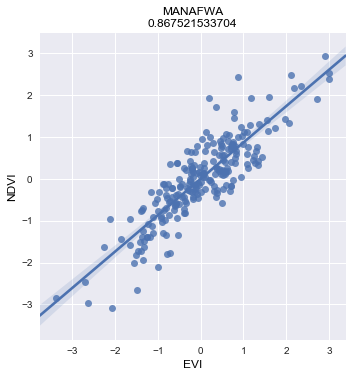

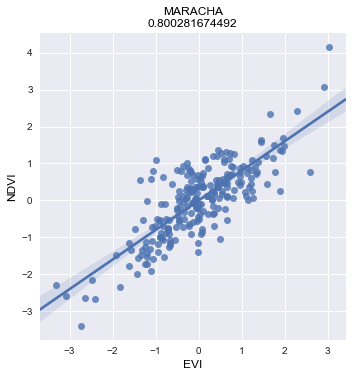

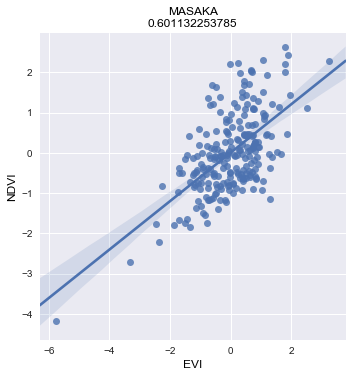

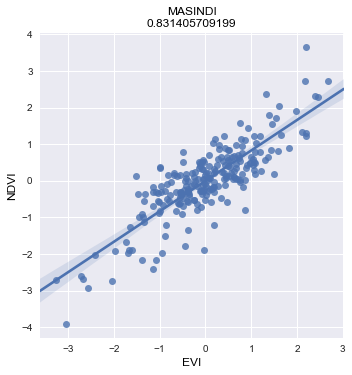

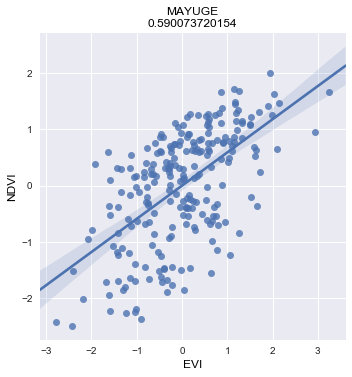

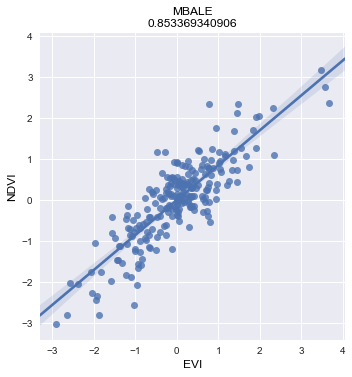

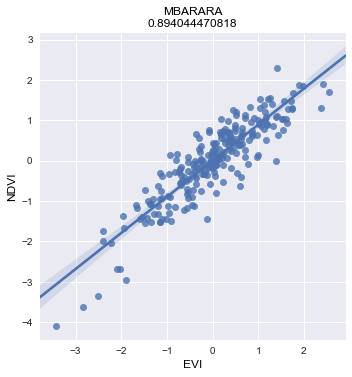

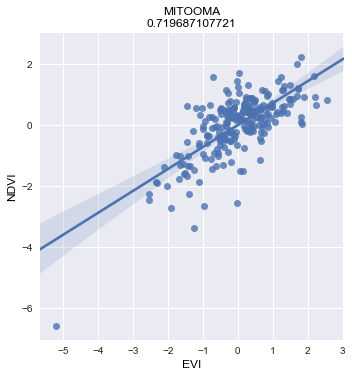

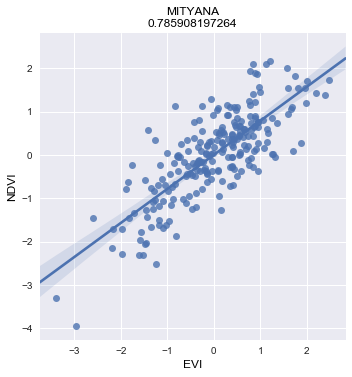

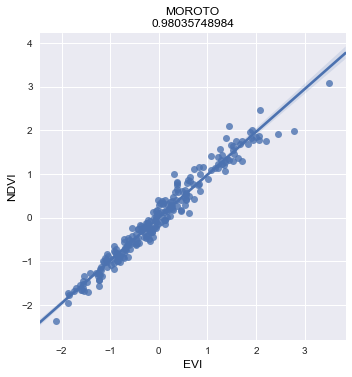

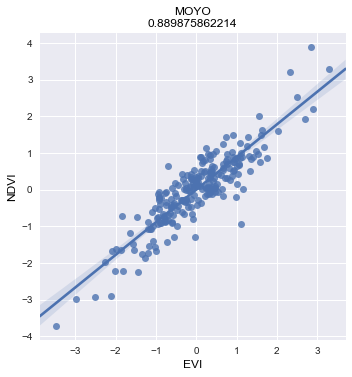

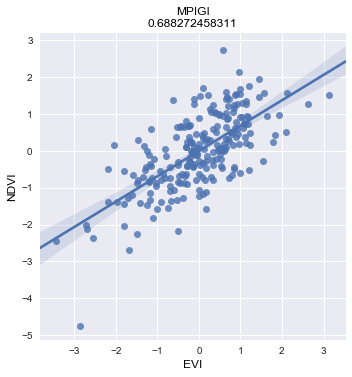

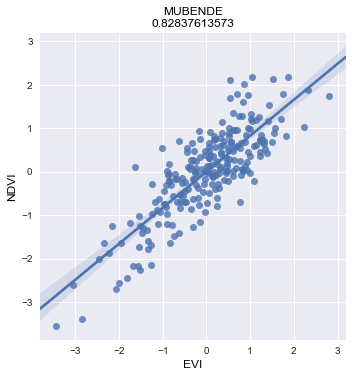

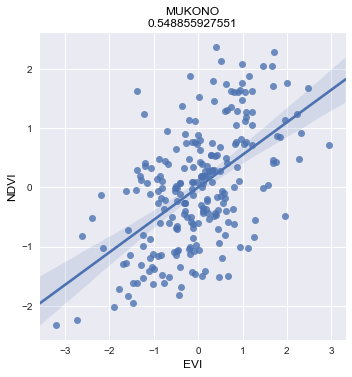

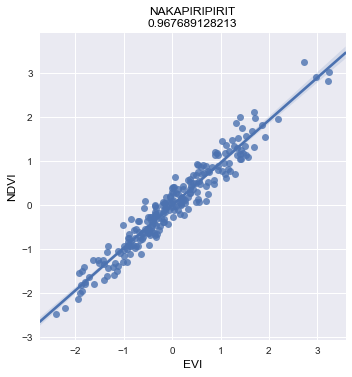

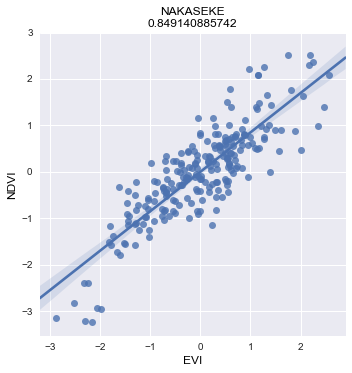

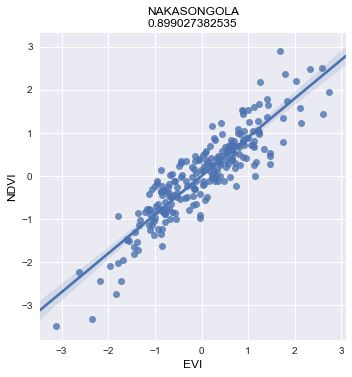

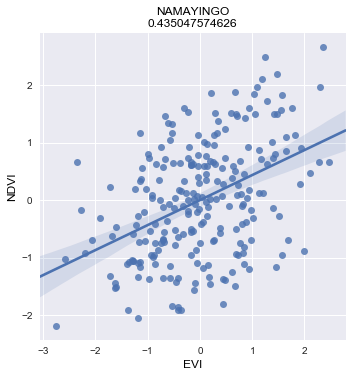

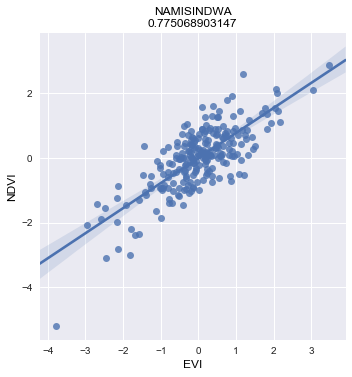

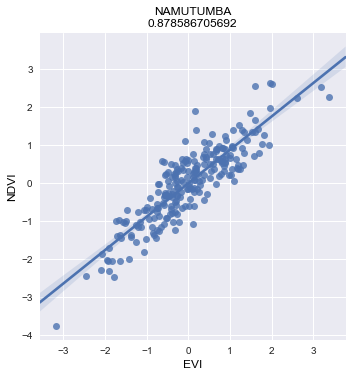

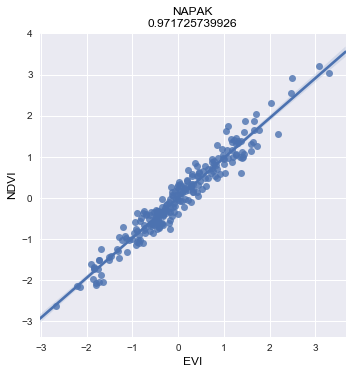

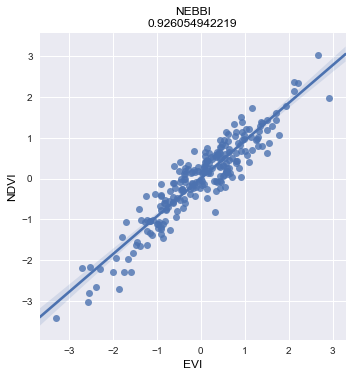

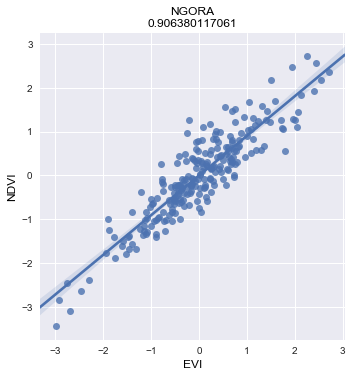

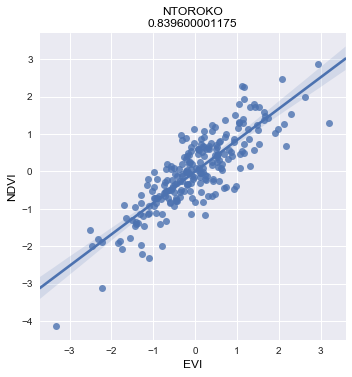

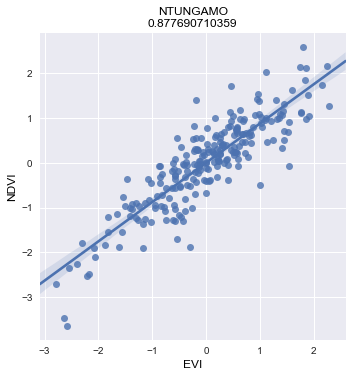

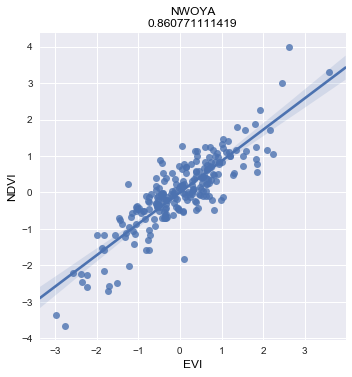

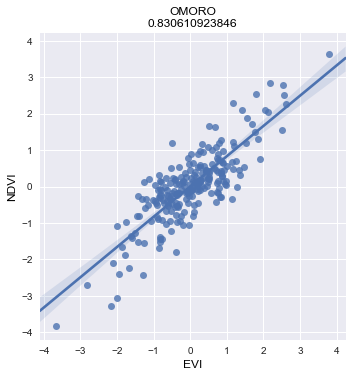

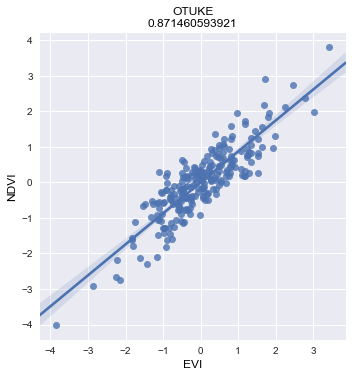

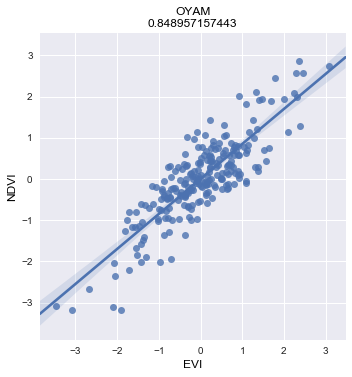

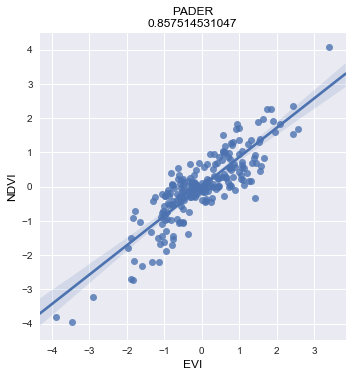

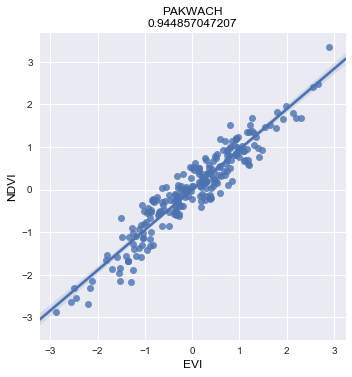

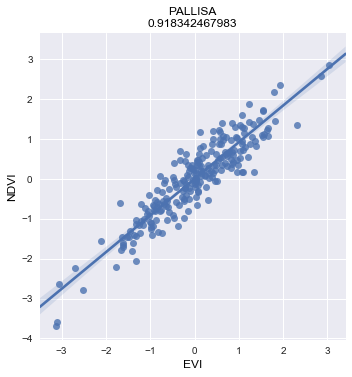

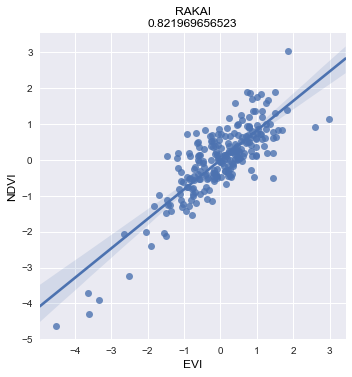

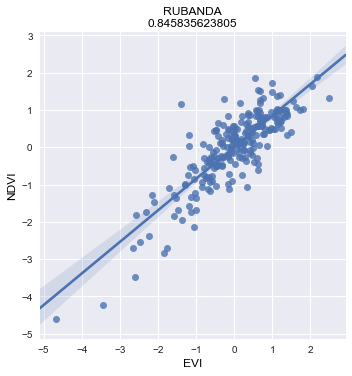

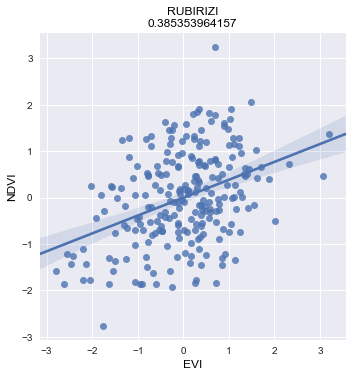

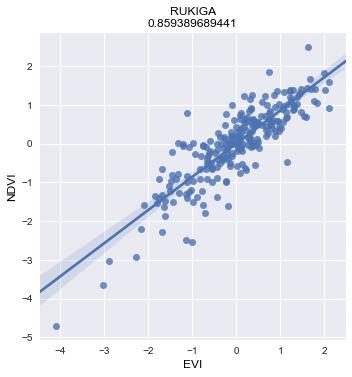

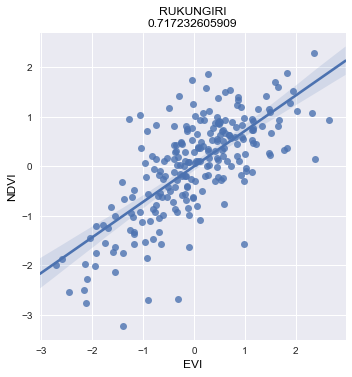

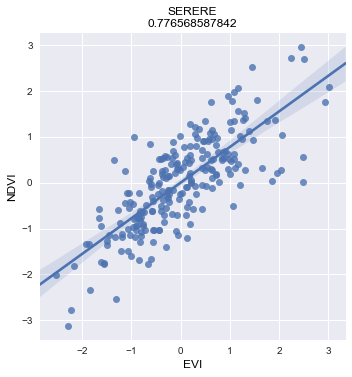

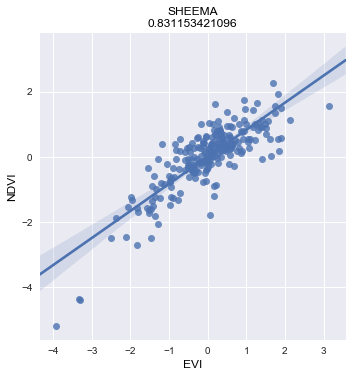

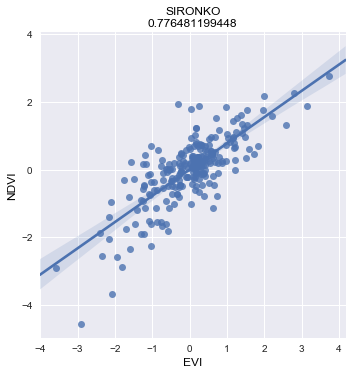

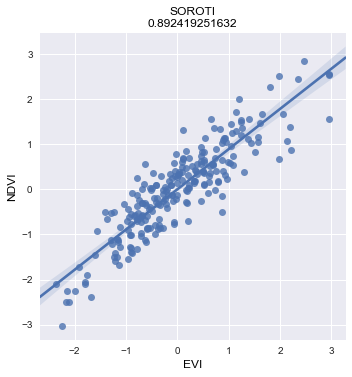

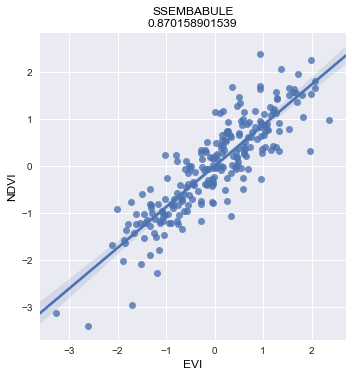

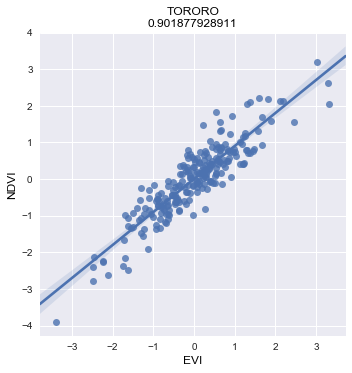

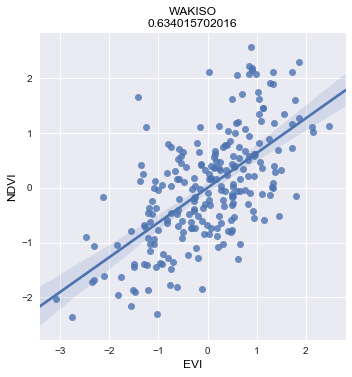

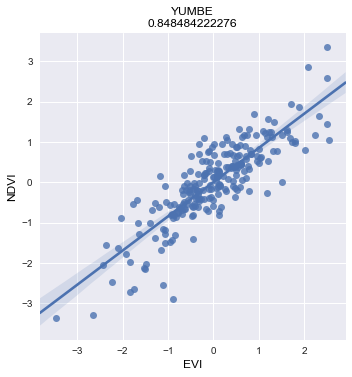

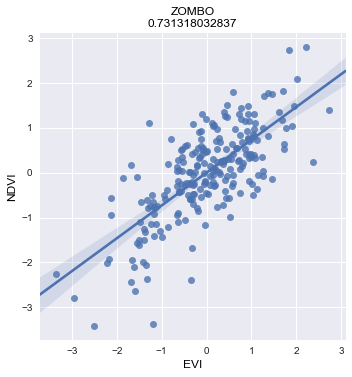

In [66]:
use_cols = ['NDVI_mean','EVI_mean','precipitation_sum','hourlyPrecipRate_sum',
            'LST_Day_1km_mean','LST_Night_1km_mean',
            'Evap_tavg_mean','Rainf_f_tavg_mean',
            'SoilMoi00_10cm_tavg_mean','SoilMoi10_40cm_tavg_mean',
            'SoilMoi40_100cm_tavg_mean','SoilMoi100_200cm_tavg_mean',
            'SoilTemp00_10cm_tavg_mean','SoilTemp10_40cm_tavg_mean',
            'SoilTemp40_100cm_tavg_mean', 'SoilTemp100_200cm_tavg_mean',
            'Tair_f_tavg_mean', 'Wind_f_tavg_mean']


my_cols = [column_names_satelite_data[X] for X in use_cols] + ['NDVI_anomaly','EVI_anomaly']
subset = UG[my_cols + ['District']].dropna()


Znorm = StandardScaler()
for district, distdata in subset.groupby('District'):
    satelite_data = distdata[my_cols]
    Znorm.fit(satelite_data)
    normed_satelite_data = pd.DataFrame(Znorm.transform(satelite_data),  columns=my_cols)
    corrcoef = np.corrcoef(normed_satelite_data['EVI_anomaly'],normed_satelite_data['NDVI_anomaly'])[0][1]
    
    plt.figure();
    sns.lmplot(x='EVI_anomaly',y='NDVI_anomaly', data=normed_satelite_data);
    plt.xlabel('EVI', fontsize=12, color='black');
    plt.ylabel('NDVI', fontsize=12, color='black');
    plt.title(district + '\n' + str(corrcoef), fontsize=12, color='black');

## outliers in vegetation indices and rainfall 

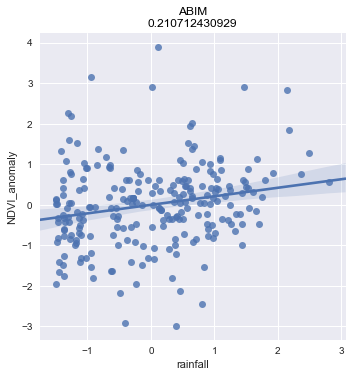

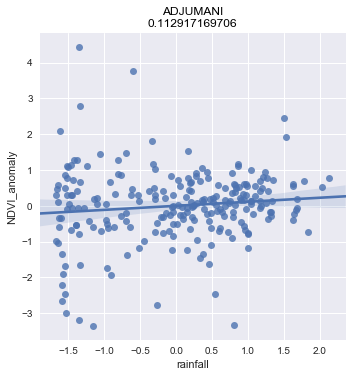

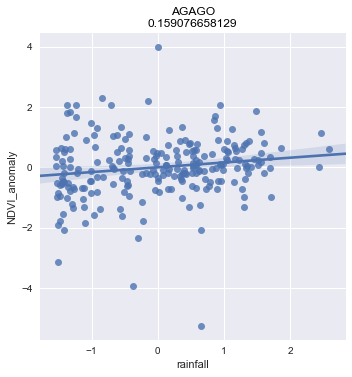

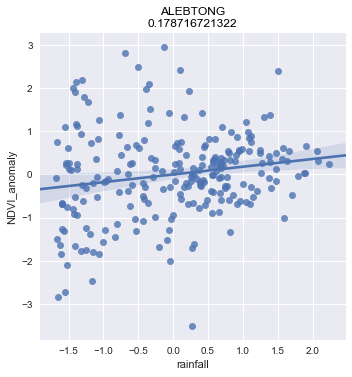

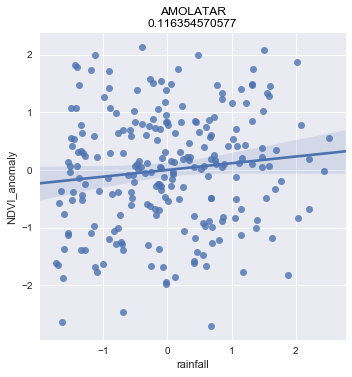

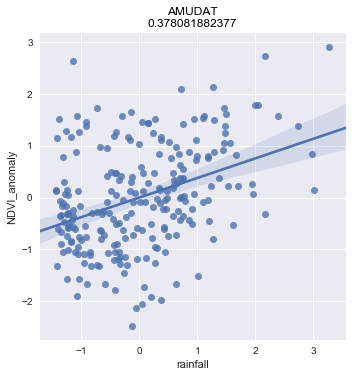

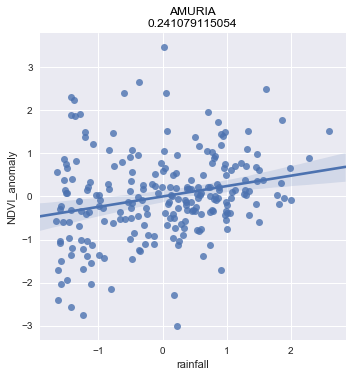

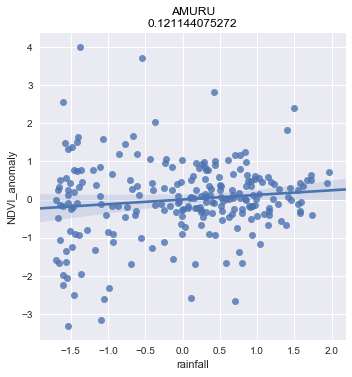

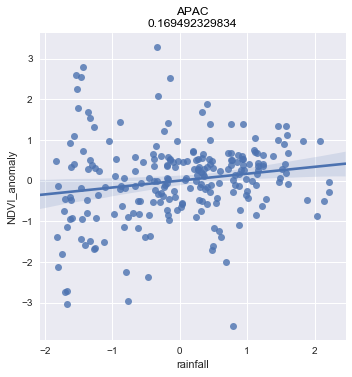

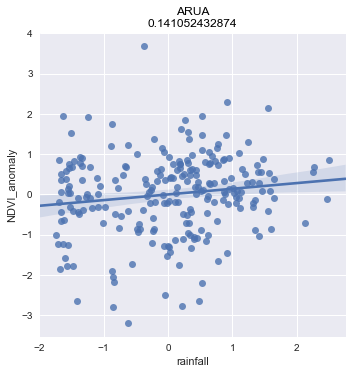

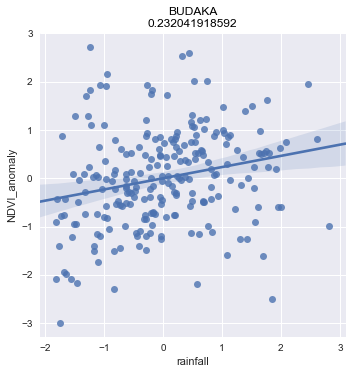

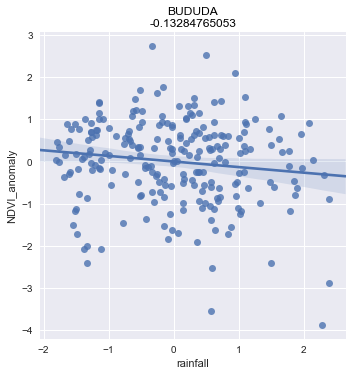

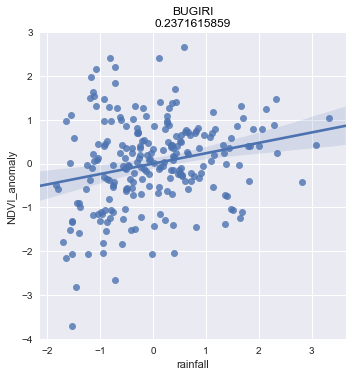

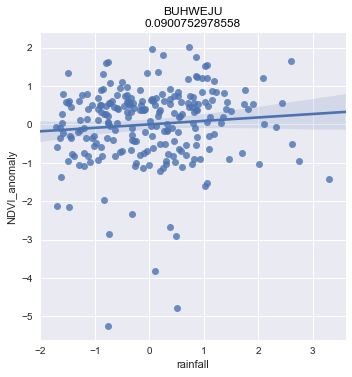

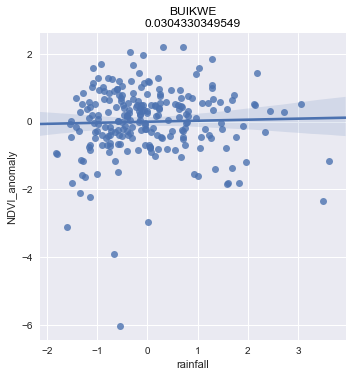

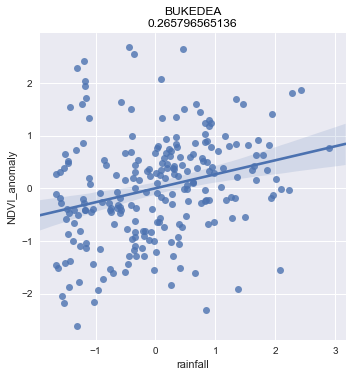

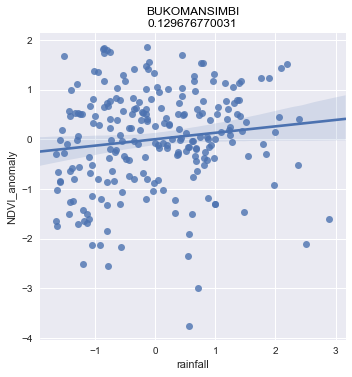

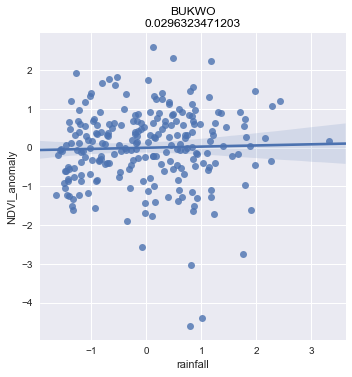

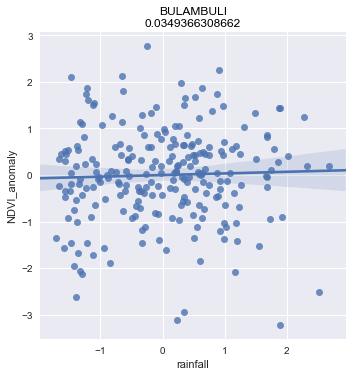

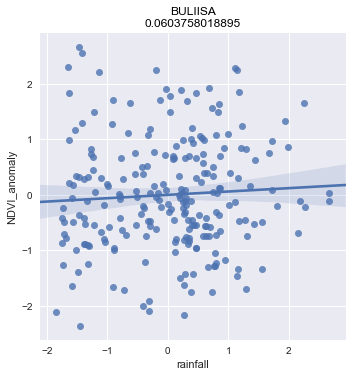

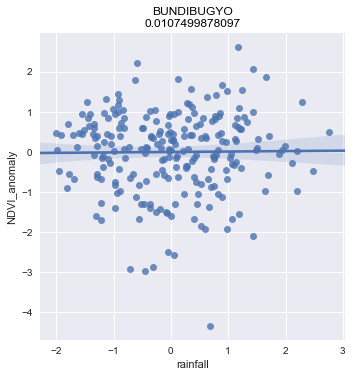

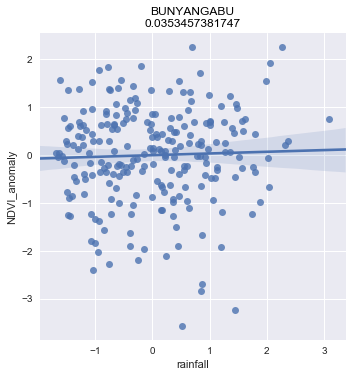

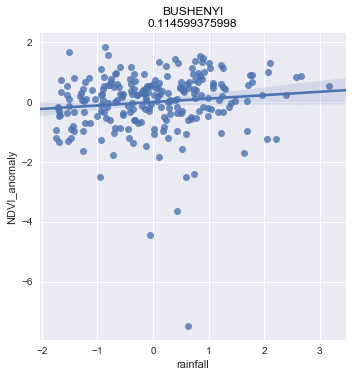

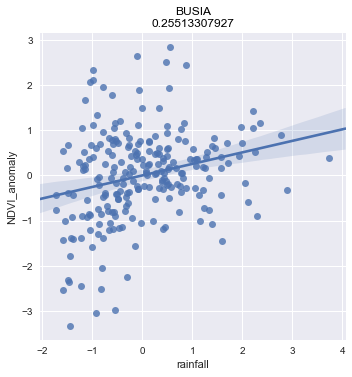

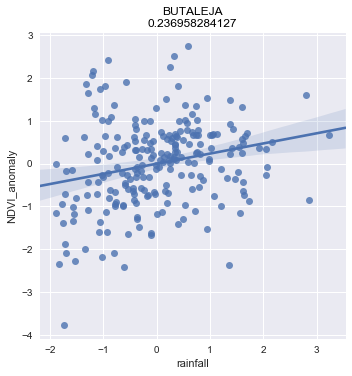

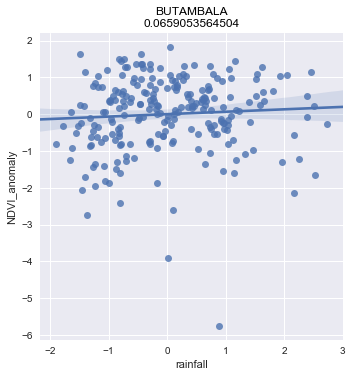

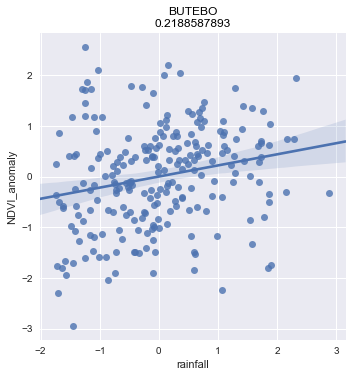

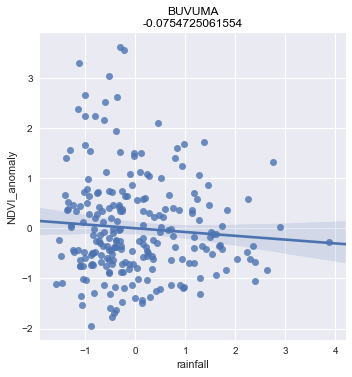

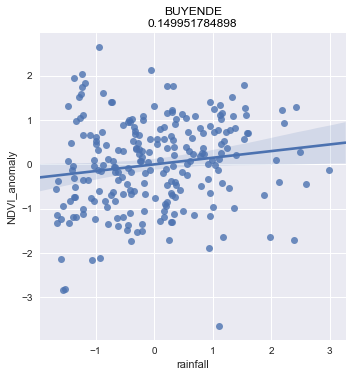

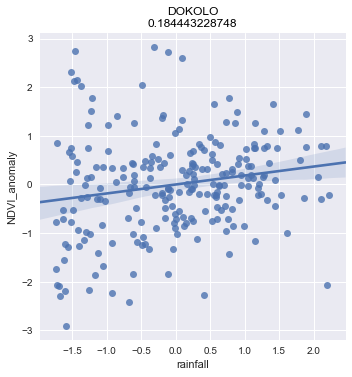

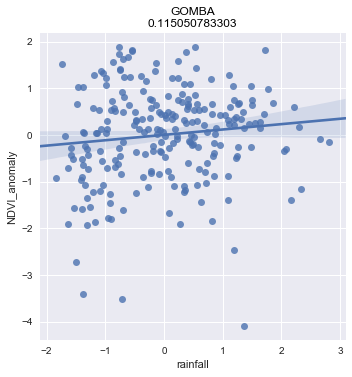

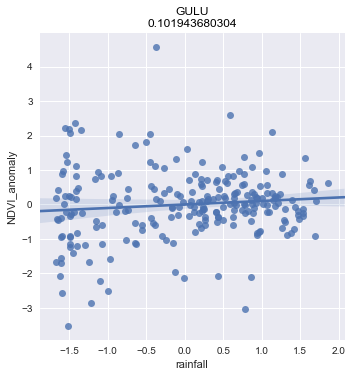

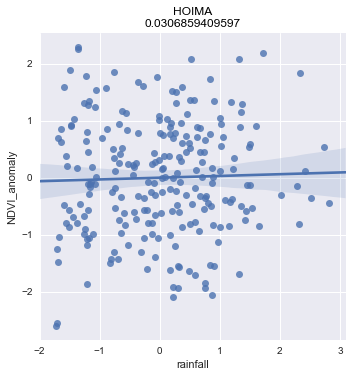

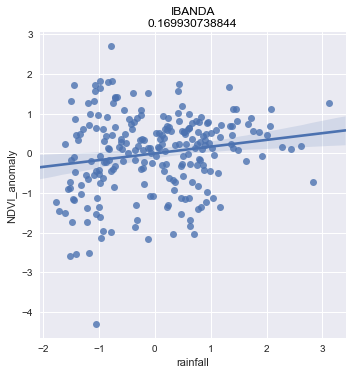

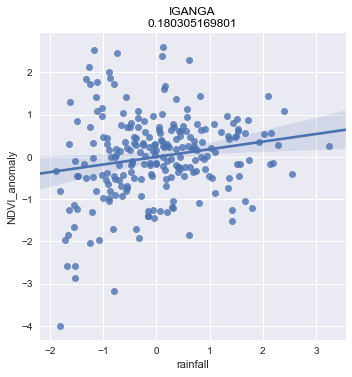

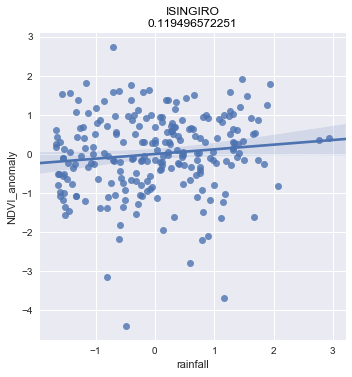

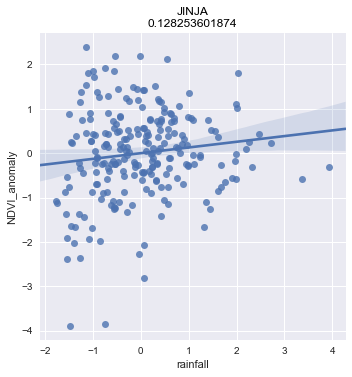

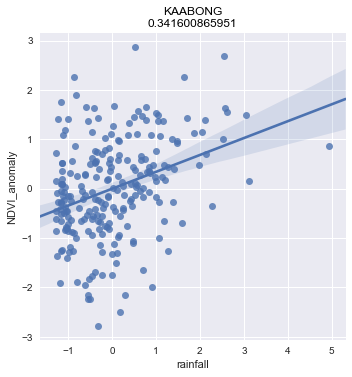

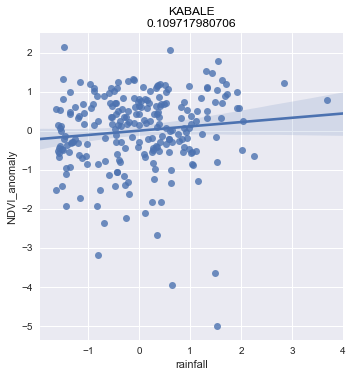

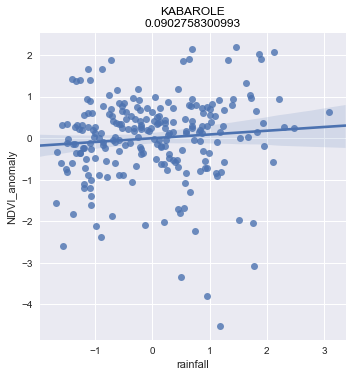

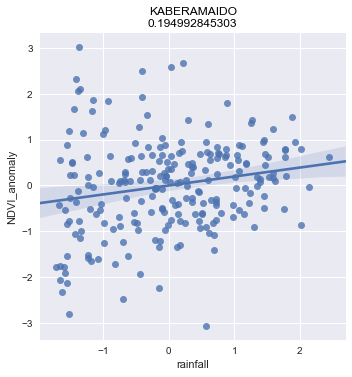

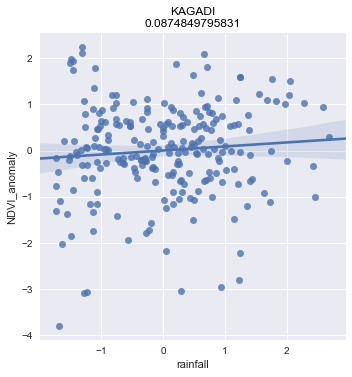

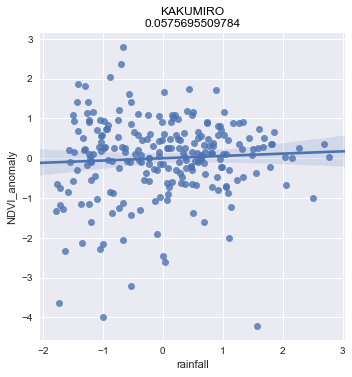

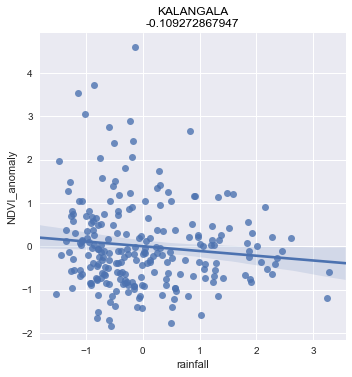

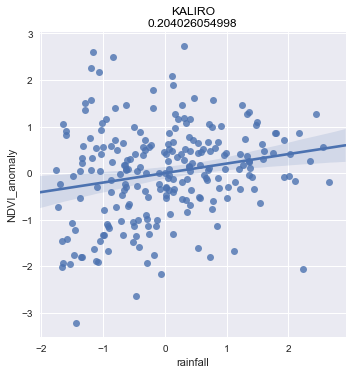

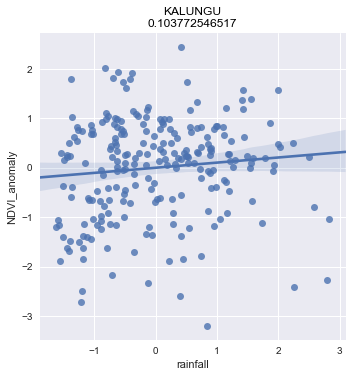

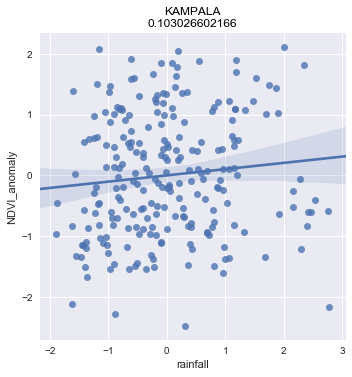

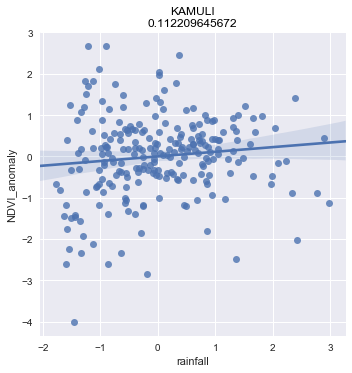

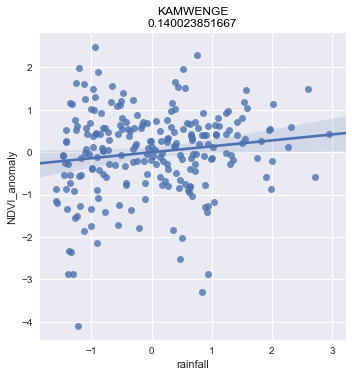

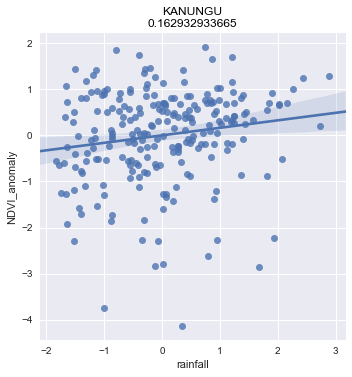

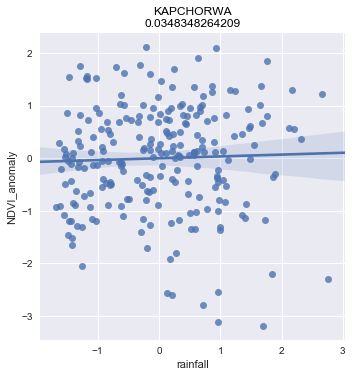

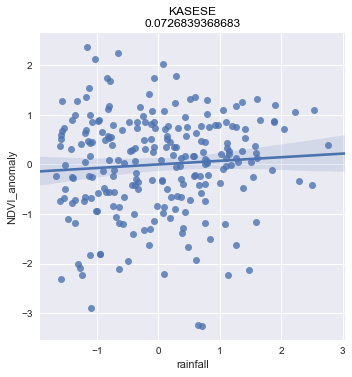

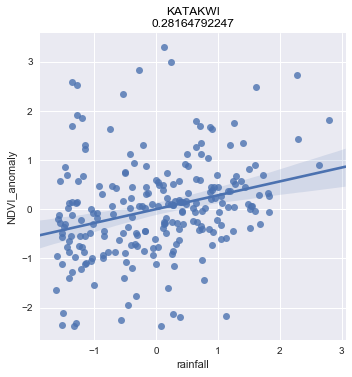

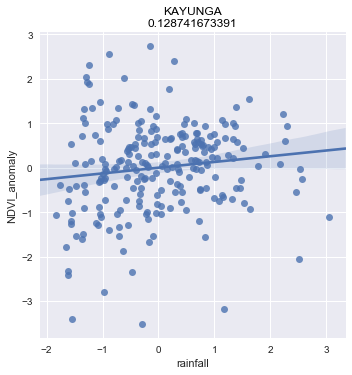

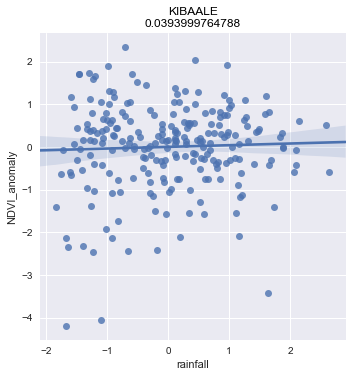

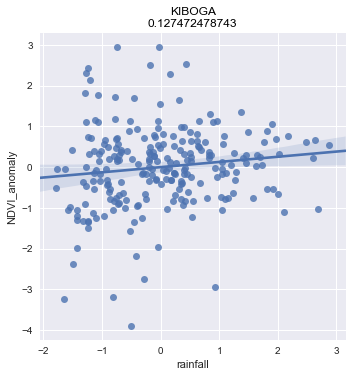

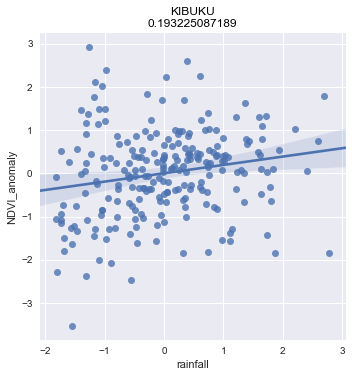

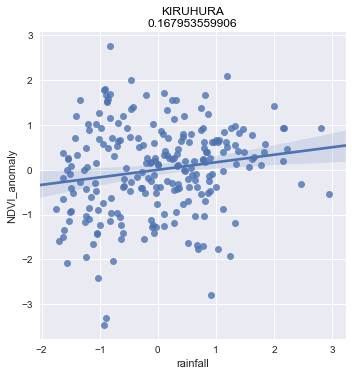

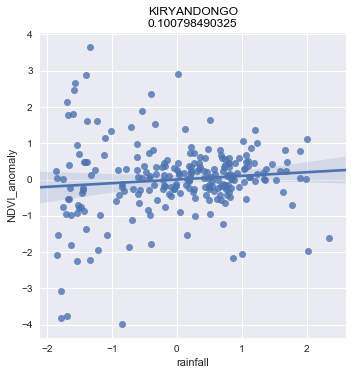

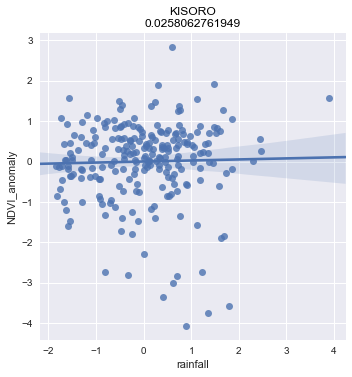

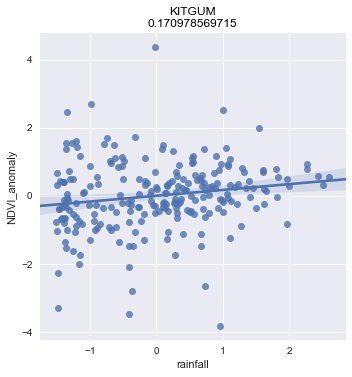

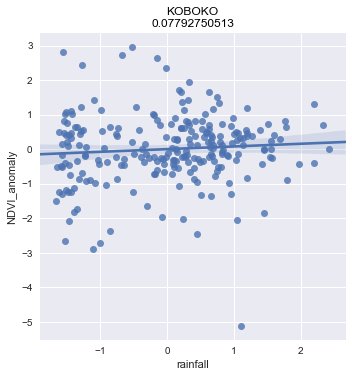

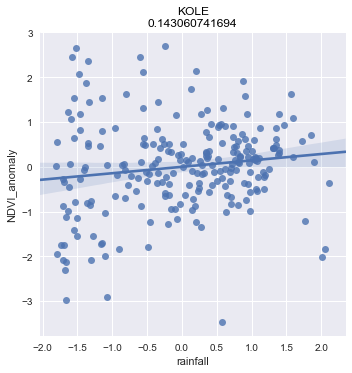

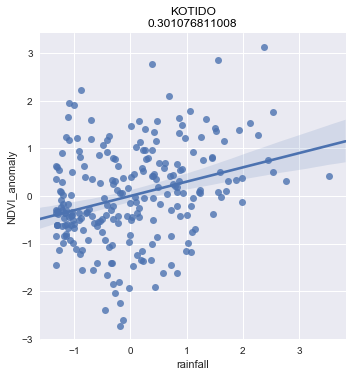

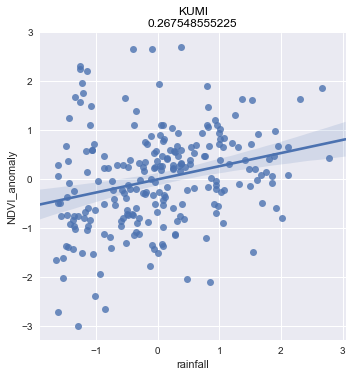

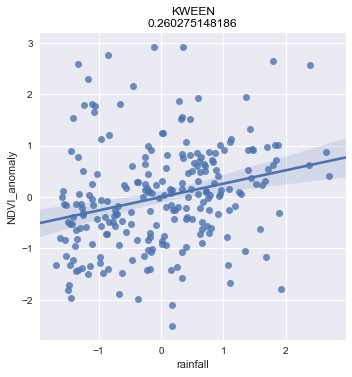

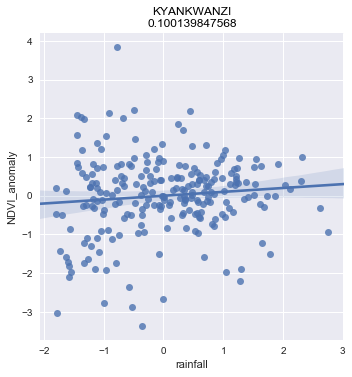

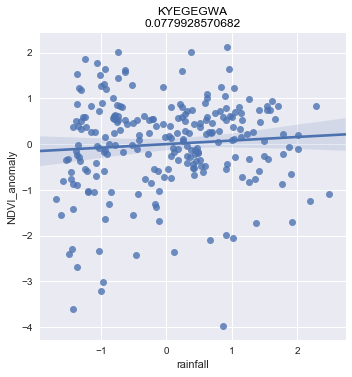

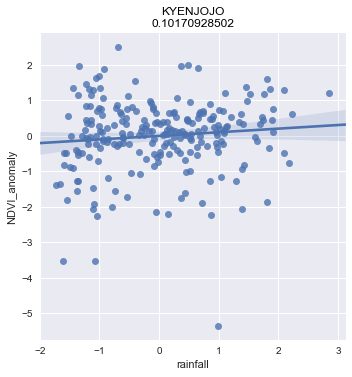

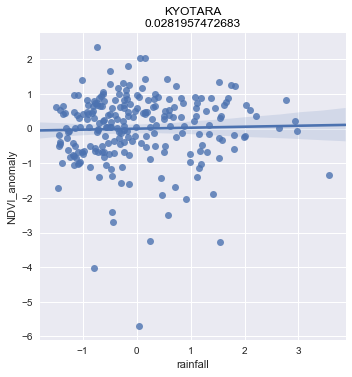

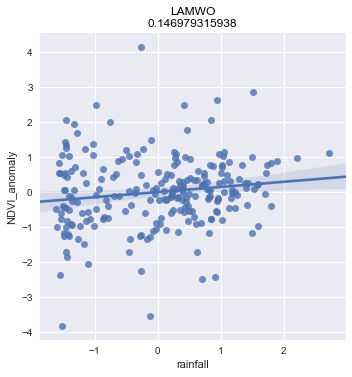

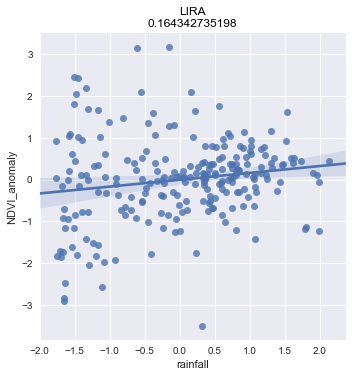

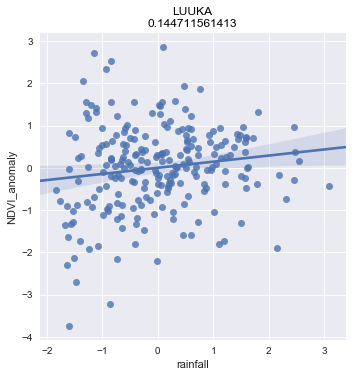

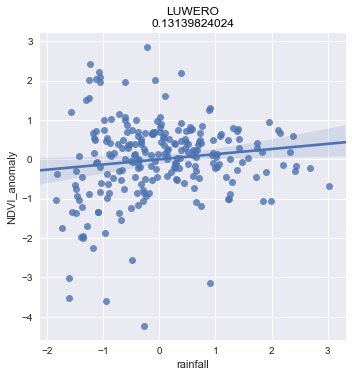

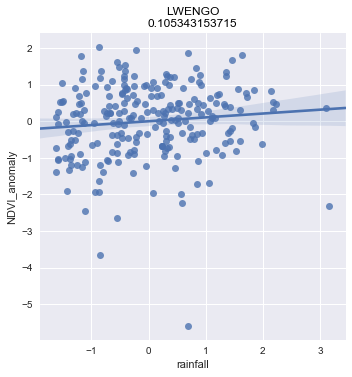

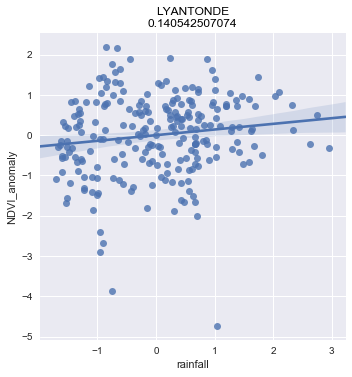

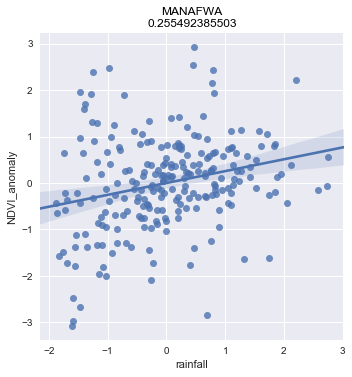

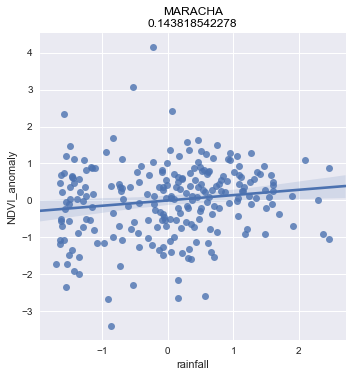

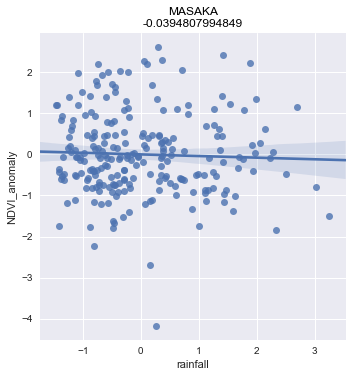

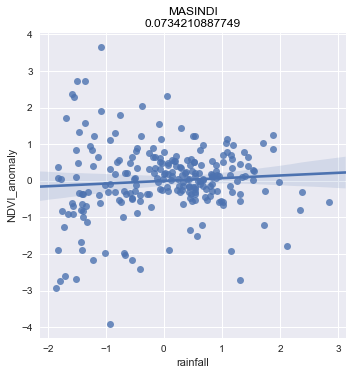

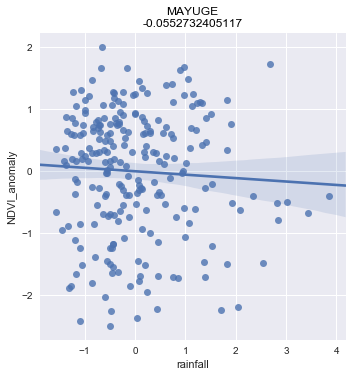

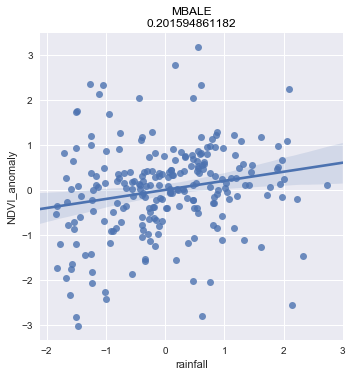

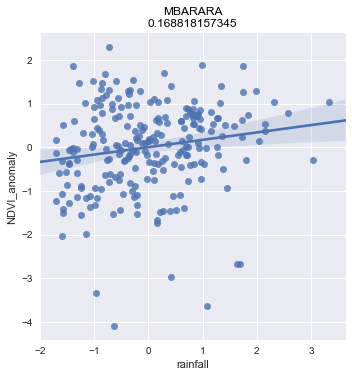

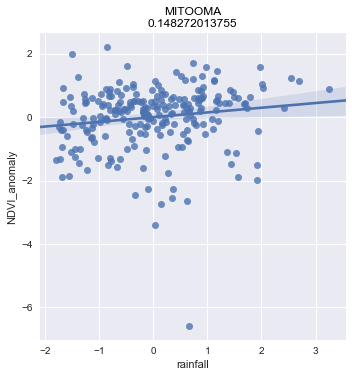

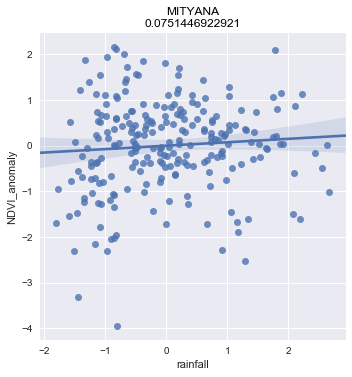

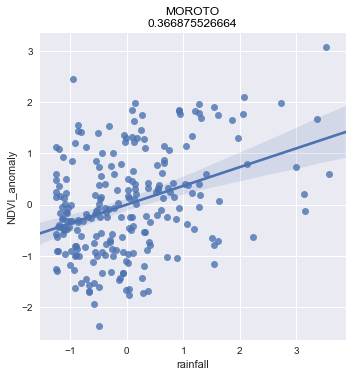

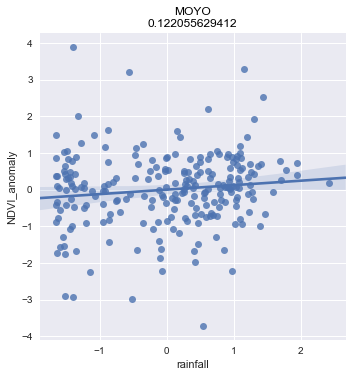

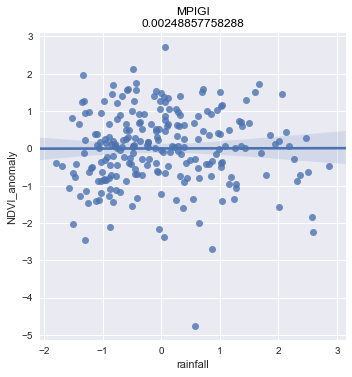

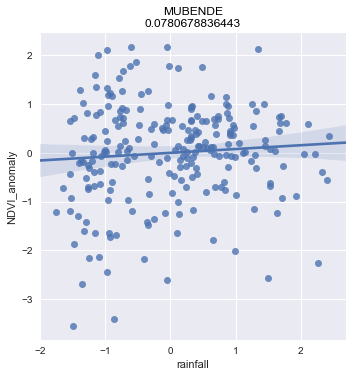

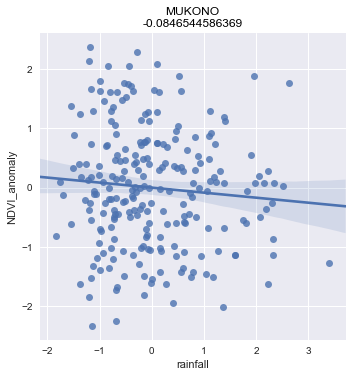

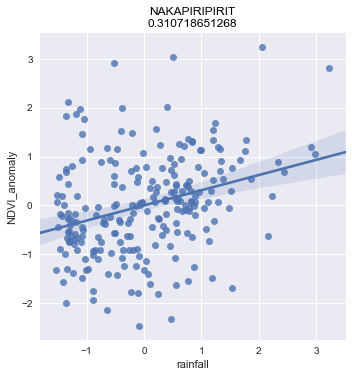

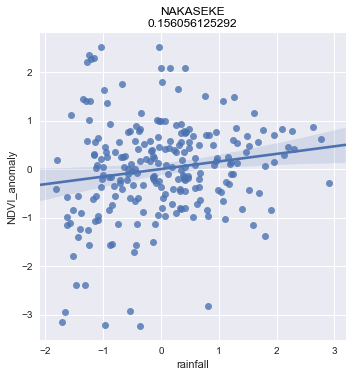

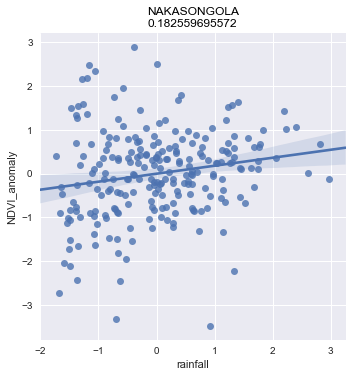

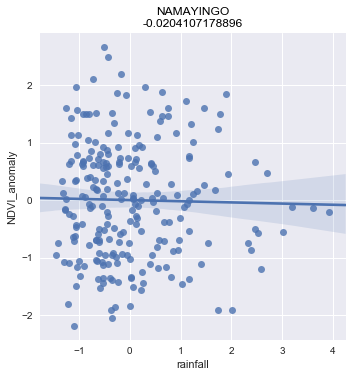

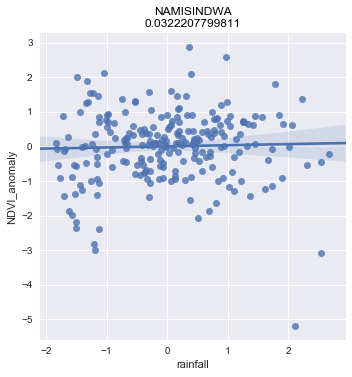

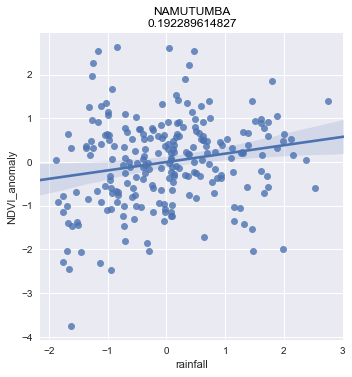

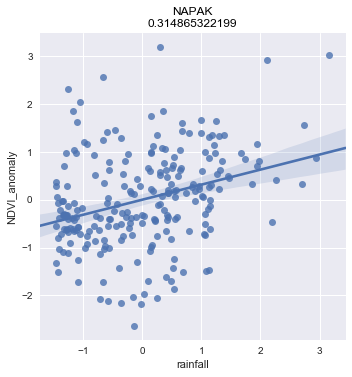

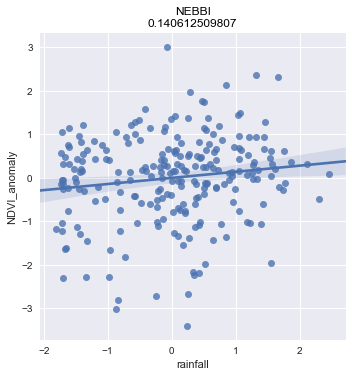

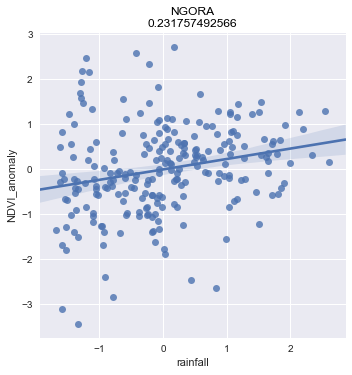

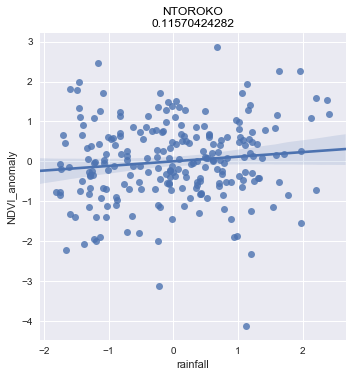

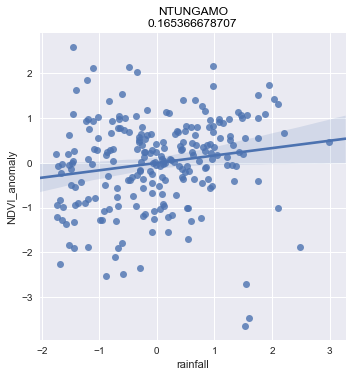

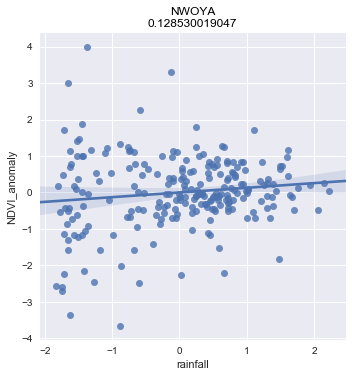

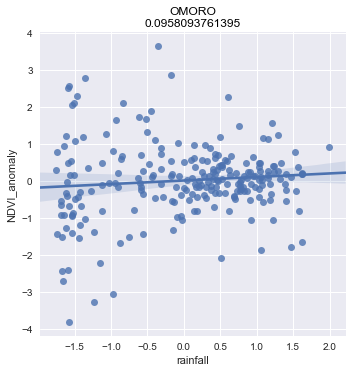

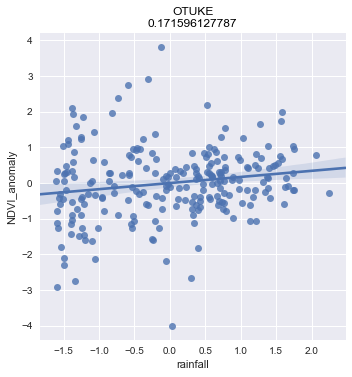

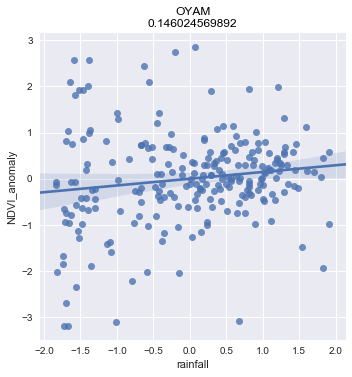

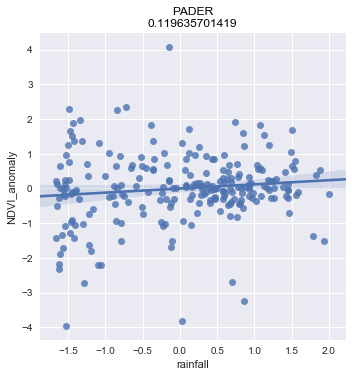

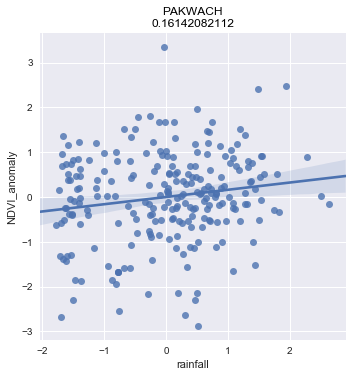

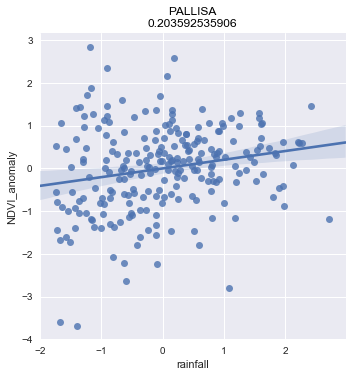

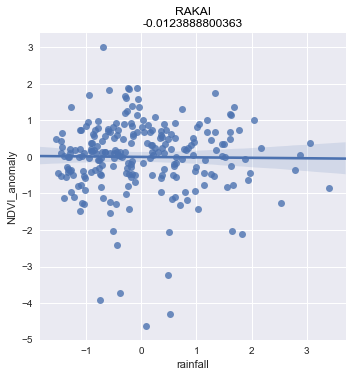

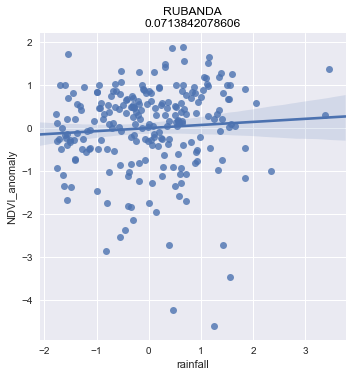

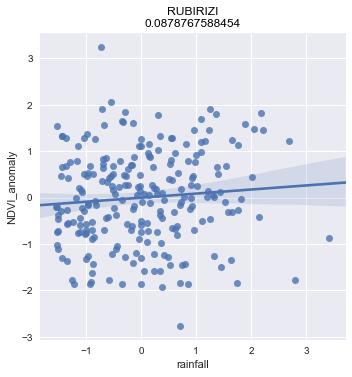

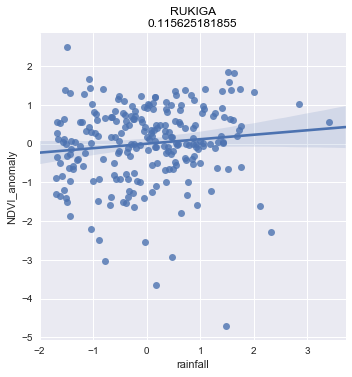

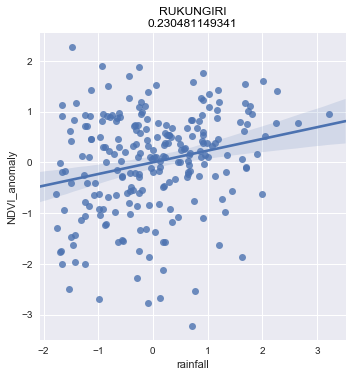

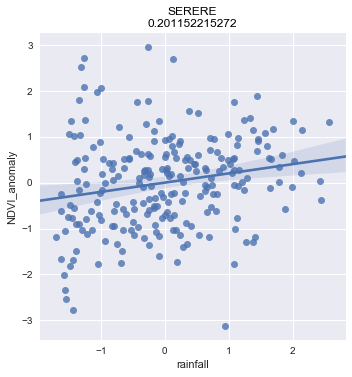

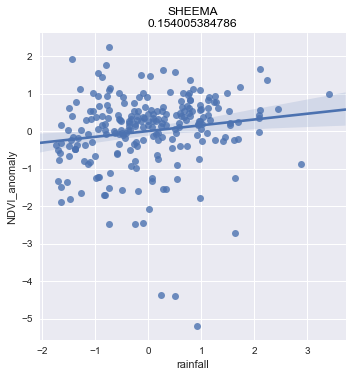

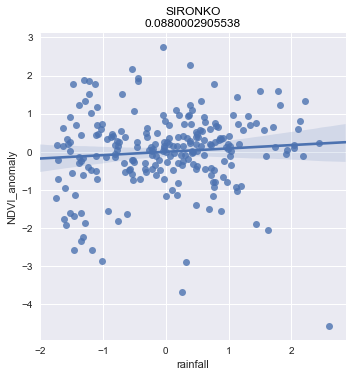

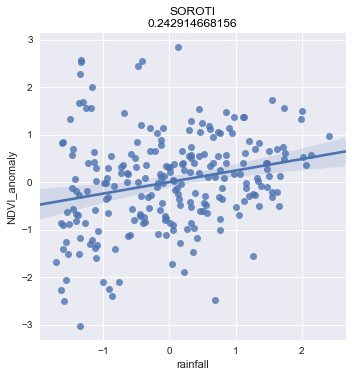

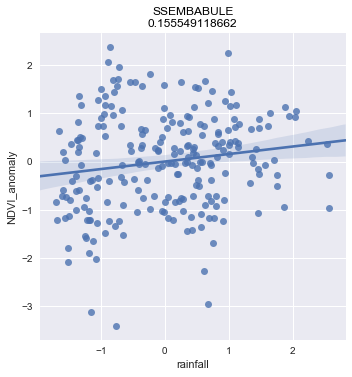

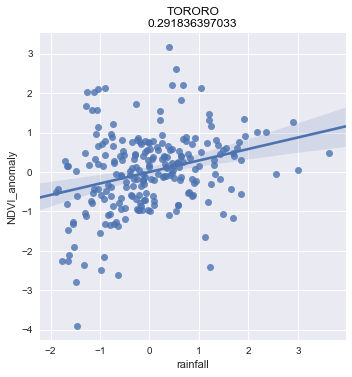

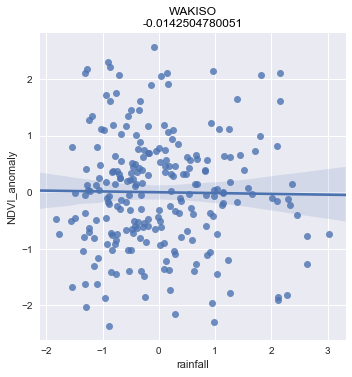

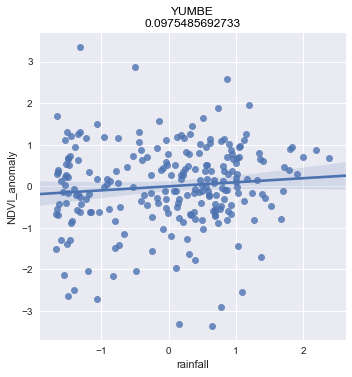

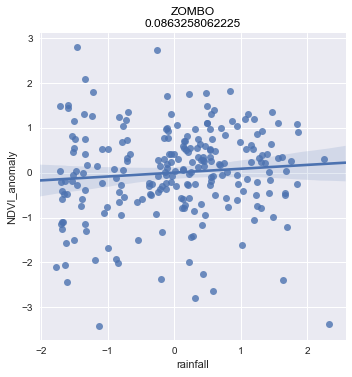

In [67]:
use_cols = ['NDVI_mean','EVI_mean','precipitation_sum','hourlyPrecipRate_sum',
            'LST_Day_1km_mean','LST_Night_1km_mean',
            'Evap_tavg_mean','Rainf_f_tavg_mean',
            'SoilMoi00_10cm_tavg_mean','SoilMoi10_40cm_tavg_mean',
            'SoilMoi40_100cm_tavg_mean','SoilMoi100_200cm_tavg_mean',
            'SoilTemp00_10cm_tavg_mean','SoilTemp10_40cm_tavg_mean',
            'SoilTemp40_100cm_tavg_mean', 'SoilTemp100_200cm_tavg_mean',
            'Tair_f_tavg_mean', 'Wind_f_tavg_mean']


my_cols = [column_names_satelite_data[X] for X in use_cols] + ['NDVI_anomaly','EVI_anomaly']
subset = UG[my_cols + ['District']].dropna()


Znorm = StandardScaler()
for district, distdata in subset.groupby('District'):
    satelite_data = distdata[my_cols]
    Znorm.fit(satelite_data)
    normed_satelite_data = pd.DataFrame(Znorm.transform(satelite_data),  columns=my_cols)
    corrcoef = np.corrcoef(normed_satelite_data['rainfall'],normed_satelite_data['NDVI_anomaly'])[0][1]
    
    plt.figure();
    sns.lmplot(x='rainfall',y='NDVI_anomaly', data=normed_satelite_data);
#     plt.xlabel('rainfall', fontsize=12, color='black');
#     plt.ylabel('NDVI_ano', fontsize=12, color='black');
    plt.title(district + '\n' + str(corrcoef), fontsize=12, color='black');

In [61]:
df = pd.read_csv('UG_NDVI_adm1.csv', delimiter=',')

df

ADM0_EN ADM0_PCODE       ADM1_EN ADM1_PCODE  DayOfYear_mean  \
0      Uganda         UG          ABIM      UG314       59.330167   
1      Uganda         UG      ADJUMANI      UG301       63.942784   
2      Uganda         UG      ALEBTONG      UG323       63.088110   
3      Uganda         UG      AMOLATAR      UG315       59.561617   
4      Uganda         UG        AMUDAT      UG324       57.853455   
5      Uganda         UG        AMURIA      UG216       62.421180   
6      Uganda         UG         AMURU      UG316       63.811145   
7      Uganda         UG          ARUA      UG303       63.962941   
8      Uganda         UG        BUDAKA      UG217       57.000000   
9      Uganda         UG        BUDUDA      UG218       62.341725   
10     Uganda         UG        BUGIRI      UG201       57.827935   
11     Uganda         UG       BUHWEJU      UG420       59.809971   
12     Uganda         UG        BUIKWE      UG117       60.719738   
13     Uganda         UG  BUKOMANSIMBI      UG118       60.632132   
14     Uganda         UG         BUKWO      UG220       58.947138   
15     Uganda         UG     BULAMBULI      UG225       58.724294   
16     Uganda         UG       BULIISA      UG416       62.299353   
17     Uganda         UG    BUNDIBUGYO      UG401       63.692688   
18     Uganda         UG    BUNYANGABU      UG430       63.965276   
19     Uganda         UG      BUSHENYI      UG402       58.263475   
20     Uganda         UG         BUSIA      UG202       57.088600   
21     Uganda         UG      BUTALEJA      UG221       57.000000   
22     Uganda         UG     BUTAMBALA      UG119       60.827985   
23     Uganda         UG        BUTEBO      UG233       58.354049   
24     Uganda         UG        BUVUMA      UG120       60.938057   
25     Uganda         UG        DOKOLO      UG317       61.983694   
26     Uganda         UG         GOMBA      UG121       61.965407   
27     Uganda         UG          GULU      UG304       64.000000   
28     Uganda         UG         HOIMA      UG432       62.989750   
29     Uganda         UG        IBANDA      UG417       61.050329   
...       ...        ...           ...        ...             ...   
29006  Uganda         UG      KYENJOJO      UG415      309.205328   
29007  Uganda         UG       KYOTARA      UG125      311.517046   
29008  Uganda         UG         LAMWO      UG326      309.125532   
29009  Uganda         UG          LIRA      UG307      312.334074   
29010  Uganda         UG         LUUKA      UG229      312.612725   
29011  Uganda         UG        LUWERO      UG104      312.533938   
29012  Uganda         UG        LWENGO      UG124      310.913317   
29013  Uganda         UG     LYANTONDE      UG114      309.013762   
29014  Uganda         UG       MANAFWA      UG223      310.032033   
29015  Uganda         UG       MARACHA      UG320      307.994269   
29016  Uganda         UG        MASAKA      UG105      312.962836   
29017  Uganda         UG       MASINDI      UG409      311.999715   
29018  Uganda         UG         MBALE      UG209      310.331061   
29019  Uganda         UG       MBARARA      UG410      308.743552   
29020  Uganda         UG       MITOOMA      UG423      310.726239   
29021  Uganda         UG         AGAGO      UG322      312.277123   
29022  Uganda         UG          APAC      UG302      314.606876   
29023  Uganda         UG   KIRYANDONGO      UG421      314.145917   
29024  Uganda         UG     KALANGALA      UG101      312.801269   
29025  Uganda         UG         YUMBE      UG313      310.552869   
29026  Uganda         UG      KABAROLE      UG405      315.021345   
29027  Uganda         UG       MITYANA      UG115      311.697925   
29028  Uganda         UG      ISINGIRO      UG418      312.452990   
29029  Uganda         UG        MAYUGE      UG214      311.555664   
29030  Uganda         UG       BUYENDE      UG226      311.929207   
29031  Uganda         UG       KAYUNGA      UG112      313.425511   
2903